# EDA: Credit Card Fraud Detection
This notebook contains exploratory data analysis of the credit card transaction data for fraud detection.

# Credit Card Fraud Detection - EDA To-Do List

Based on the data preview, here's a structured to-do list for your credit card fraud detection EDA:

## 1. Data Understanding
- [ ] **Data Structure**
  - [ ] Check dataset dimensions (rows × columns)
  - [ ] List all features and their data types
  - [ ] Identify the target variable (Class: 0=legitimate, 1=fraud)

## 2. Data Quality Check
- [ ] **Missing Values**
  - [ ] Check for missing values in each column
  - [ ] Document any missing data patterns
- [ ] **Duplicates**
  - [ ] Check for duplicate transactions
  - [ ] Document findings

## 3. Class Distribution Analysis
- [ ] **Class Imbalance**
  - [ ] Calculate the percentage of fraud vs. non-fraud cases
  - [ ] Visualize the class distribution
  - [ ] Note any data imbalance considerations

## 4. Time Feature Analysis
- [ ] **Time Column**
  - [ ] Understand the time unit (likely seconds since first transaction)
  - [ ] Convert to datetime if possible
  - [ ] Analyze transaction patterns over time
  - [ ] Check for any time-based patterns in fraud

## 5. Amount Analysis
- [ ] **Transaction Amounts**
  - [ ] Basic statistics (min, max, mean, median, std)
  - [ ] Distribution visualization (consider log scale)
  - [ ] Compare amount distributions between fraud and non-fraud
  - [ ] Identify any amount thresholds for fraud

## 6. PCA Features Analysis (V1-V28)
- [ ] **Feature Distributions**
  - [ ] Basic statistics for each PCA component
  - [ ] Visualize distributions of first few components
  - [ ] Compare distributions between fraud and non-fraud
- [ ] **Outlier Detection**
  - [ ] Identify potential outliers in PCA components
  - [ ] Document any extreme values

## 7. Correlation Analysis
- [ ] **Feature Correlations**
  - [ ] Correlation matrix of all features
  - [ ] Identify highly correlated features
  - [ ] Correlations with the target variable (Class)
  - [ ] Visualize top correlations with heatmap

## 8. Time-Based Patterns
- [ ] **Temporal Analysis**
  - [ ] Convert time to hours of day
  - [ ] Analyze fraud frequency by time of day
  - [ ] Identify peak fraud periods
  - [ ] Visualize time-based patterns

## 9. Bivariate Analysis
- [ ] **Amount vs. Time**
  - [ ] Scatter plot of transaction amount over time
  - [ ] Highlight fraud cases
- [ ] **Amount vs. PCA Features**
  - [ ] Scatter plots of amount vs. top PCA components
  - [ ] Look for patterns in fraud distribution

## 10. Feature Engineering Ideas
- [ ] **Potential New Features**
  - [ ] Time-based features (hour of day, day of week)
  - [ ] Transaction amount categories
  - [ ] Interaction terms between key features
  - [ ] Statistical aggregations

## 11. Documentation
- [ ] **Summary of Findings**
  - [ ] Document key insights
  - [ ] Note any data quality issues
  - [ ] List potential features for modeling
  - [ ] Document class imbalance and potential solutions

## 12. Next Steps
- [ ] **Modeling Preparation**
  - [ ] Feature scaling requirements
  - [ ] Class imbalance handling strategy
  - [ ] Feature selection considerations
  - [ ] Cross-validation strategy

## 13. Final Deliverables
- [ ] **Notebook with:**
  - [ ] Clear markdown explanations
  - [ ] Well-labeled visualizations
  - [ ] Reproducible code
  - [ ] Summary of key findings
  - [ ] Recommendations for modeling

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [4]:
# Configuration
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format)

## Load the data

In [5]:
# Load the dataset
df = pd.read_csv('../data/raw/creditcard.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nData types and missing values:")
df.info()

Dataset shape: (284807, 31)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  f

In [6]:
# Basic statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [7]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Remove the duplicates

In [8]:
# Remove duplicate rows where all column values match
initial_count = len(df)
df = df.drop_duplicates()
removed_count = initial_count - len(df)

print(f"Removed {removed_count} duplicate rows")
print(f"Original rows: {initial_count}")
print(f"Rows after deduplication: {len(df)}")

Removed 1081 duplicate rows
Original rows: 284807
Rows after deduplication: 283726


## Class distribution

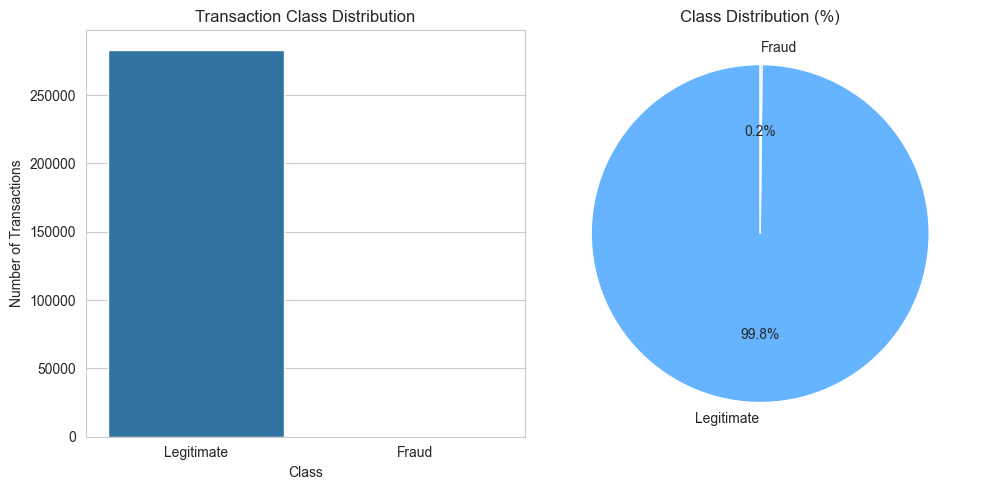


Class Distribution:


,count,Percentage
Class,,
Legitimate,283253,99.83
Fraud,473,0.17



Class Imbalance Notes:
- The dataset is highly imbalanced with fraud cases representing only 0.17% of all transactions
- This imbalance needs to be addressed during model training (e.g., using class weights, SMOTE, or other techniques)
- Evaluation metrics like accuracy can be misleading; precision, recall, and F1-score are more appropriate


In [9]:
# 1. Calculate class distribution
class_dist = df['Class'].value_counts().to_frame()
class_dist['Percentage'] = (class_dist['count'] / len(df)) * 100
class_dist.index = class_dist.index.map({0: 'Legitimate', 1: 'Fraud'})

# 2. Visualize class distribution
plt.figure(figsize=(10, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Number of Transactions')

# Pie chart to show the imbalance
plt.subplot(1, 2, 2)
plt.pie(class_dist['count'], 
        labels=class_dist.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999'])
plt.title('Class Distribution (%)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular

plt.tight_layout()
plt.show()

# 3. Display the distribution in numbers
print("\nClass Distribution:")
display(class_dist)

# 4. Note on class imbalance
print("\nClass Imbalance Notes:")
print("- The dataset is highly imbalanced with fraud cases representing only {:.2f}% of all transactions".format(class_dist.loc['Fraud', 'Percentage']))
print("- This imbalance needs to be addressed during model training (e.g., using class weights, SMOTE, or other techniques)")
print("- Evaluation metrics like accuracy can be misleading; precision, recall, and F1-score are more appropriate")

## Time based analysis

Time Statistics (in hours):
         count  mean   std  min   25%   50%   75%   max
Hour 283726.00 26.34 13.19 0.00 15.06 23.53 38.69 48.00


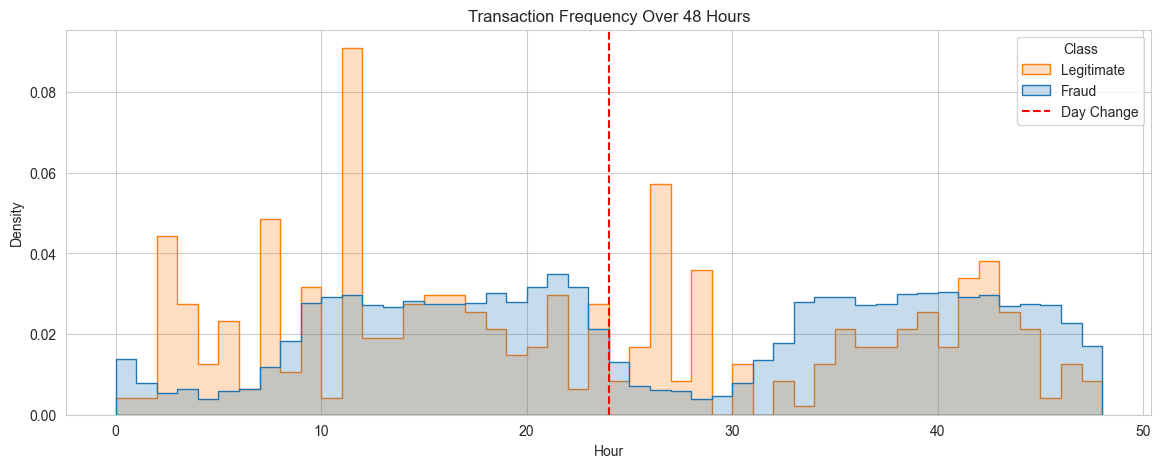

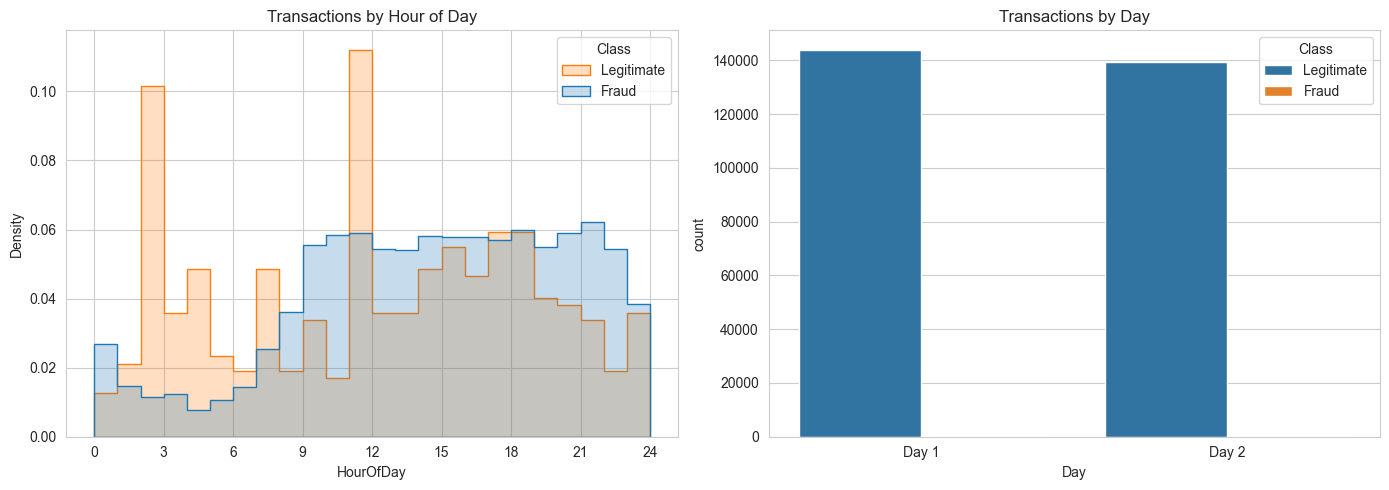


Time Between Transactions (seconds):


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283252.00,0.61,1.05,0.00,0.00,0.00,1.00,32.00
1,473.00,1.13,1.89,0.00,0.00,1.00,1.00,16.00


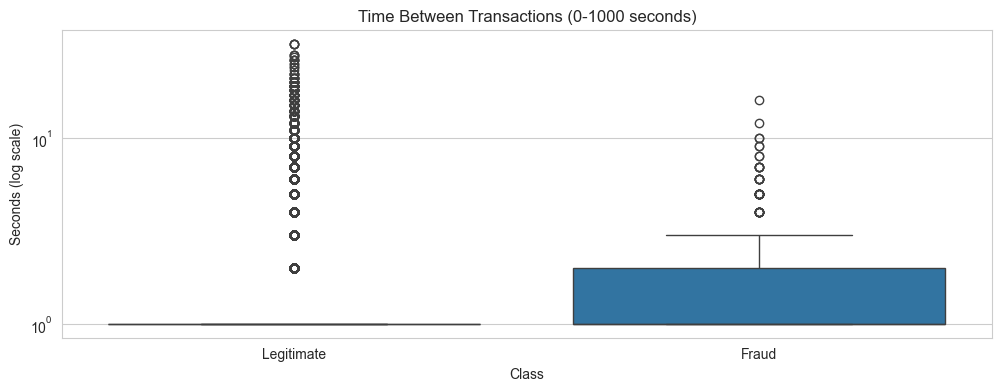

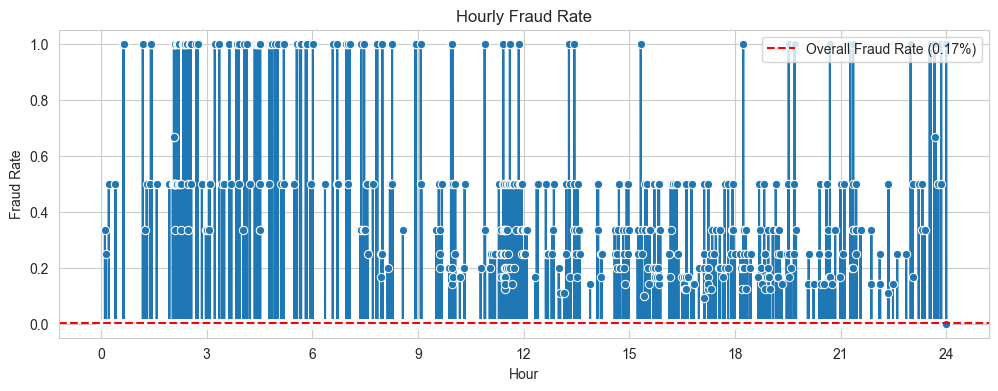

In [10]:
# 1. Create time-based features
df['Hour'] = df['Time'] / 3600  # Convert seconds to hours
df['HourOfDay'] = df['Hour'] % 24  # Extract hour of day (0-23)
df['Day'] = df['Hour'] // 24  # Day number (0 and 1 for the 2-day period)

# 2. Basic time statistics
print("Time Statistics (in hours):")
print(df['Hour'].describe().to_frame().T)

# 3. Plot transaction frequency over time
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x='Hour', bins=48, hue='Class', 
             element='step', stat='density', common_norm=False)
plt.title('Transaction Frequency Over 48 Hours')
plt.axvline(x=24, color='r', linestyle='--', label='End of Day 1')
plt.legend(title='Class', labels=['Legitimate', 'Fraud', 'Day Change'])
plt.show()

# 4. Compare day vs night patterns
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='HourOfDay', bins=24, hue='Class', 
             element='step', stat='density', common_norm=False)
plt.title('Transactions by Hour of Day')
plt.xticks(range(0, 25, 3))
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])

# 5. Compare between the two days
plt.subplot(1, 2, 2)
sns.countplot(x='Day', hue='Class', data=df)
plt.title('Transactions by Day')
plt.xticks([0, 1], ['Day 1', 'Day 2'])
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# 6. Time between transactions
df['TimeDiff'] = df['Time'].diff()  # Time since last transaction
time_diff_stats = df.groupby('Class')['TimeDiff'].describe()
print("\nTime Between Transactions (seconds):")
display(time_diff_stats)

# 7. Plot time differences
plt.figure(figsize=(12, 4))
sns.boxplot(x='Class', y='TimeDiff', 
            data=df[(df['TimeDiff'] < 1000) & (df['TimeDiff'] > 0)])  # Filtering for better visualization
plt.title('Time Between Transactions (0-1000 seconds)')
plt.yscale('log')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Seconds (log scale)')
plt.show()

# 8. Hourly fraud rate
hourly_fraud = df.groupby('HourOfDay')['Class'].agg(['count', 'mean']).reset_index()
hourly_fraud.columns = ['Hour', 'TotalTransactions', 'FraudRate']

plt.figure(figsize=(12, 4))
sns.lineplot(data=hourly_fraud, x='Hour', y='FraudRate', marker='o')
plt.title('Hourly Fraud Rate')
plt.axhline(y=df['Class'].mean(), color='r', linestyle='--', 
            label=f'Overall Fraud Rate ({df["Class"].mean()*100:.2f}%)')
plt.xticks(range(0, 25, 3))
plt.ylabel('Fraud Rate')
plt.legend()
plt.show()

## Amount analysis

Transaction Amount Statistics by Class:


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.00,88.41,250.38,0.00,5.67,22.00,77.46,25691.16
1,473.00,123.87,260.21,0.00,1.00,9.82,105.89,2125.87


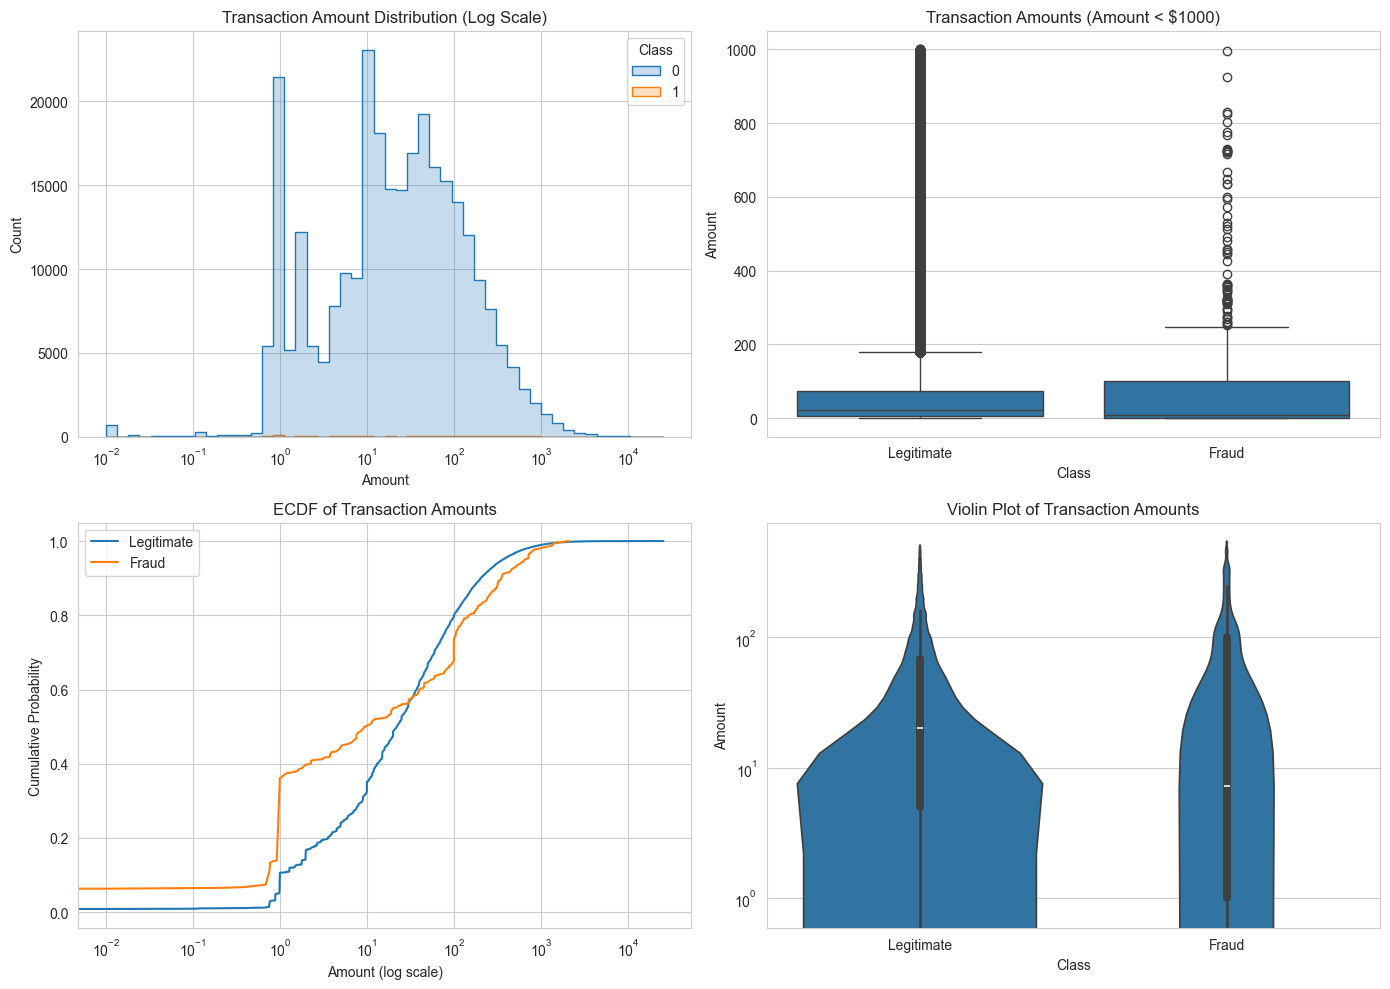


Fraud Rate by Amount Ranges:
             TransactionCount  FraudRate
AmountRange                             
0-10                    98013       0.22
10-50                   90327       0.06
50-100                  37179       0.15
100-500                 47290       0.19
500-1000                 6174       0.40
1000+                    2935       0.31

Top 10 Most Common Amounts (Legitimate vs Fraud):


C:\Users\My Device\AppData\Local\Temp\ipykernel_21220\974330509.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_analysis = df.groupby('AmountRange')['Class'].agg(['count', 'mean'])


,Legitimate,Fraud,Total,FraudPercentage
Amount,,,,
1.00,13461,105,13566,0.77
1.98,6044,0,6044,0.00
0.89,4871,0,4871,0.00
9.99,4737,1,4738,0.02
15.00,3280,0,3280,0.00
0.76,2960,17,2977,0.57
10.00,2948,0,2948,0.00
1.29,2892,0,2892,0.00
1.79,2622,1,2623,0.04



Statistical Test Results:
T-statistic: -2.96
P-value: 3.22e-03

The very small p-value suggests a statistically significant difference in transaction amounts between fraud and legitimate transactions.


In [11]:
# 1. Basic statistics
amount_stats = df.groupby('Class')['Amount'].describe()
print("Transaction Amount Statistics by Class:")
display(amount_stats)

# 2. Distribution visualization
plt.figure(figsize=(14, 10))

# Histogram (log scale for better visualization)
plt.subplot(2, 2, 1)
sns.histplot(data=df[df['Amount'] > 0], x='Amount', hue='Class', 
             element='step', bins=50, log_scale=True, common_norm=False)
plt.title('Transaction Amount Distribution (Log Scale)')

# Boxplot (focus on amounts under 1000 for better visibility)
plt.subplot(2, 2, 2)
sns.boxplot(x='Class', y='Amount', data=df[df['Amount'] < 1000])
plt.title('Transaction Amounts (Amount < $1000)')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])

# ECDF plot to compare distributions
plt.subplot(2, 2, 3)
for c in [0, 1]:
    ecdf = df[df['Class'] == c]['Amount'].value_counts().sort_index().cumsum()
    plt.plot(ecdf.index, ecdf/ecdf.max(), 
             label='Fraud' if c == 1 else 'Legitimate')
plt.xscale('log')
plt.title('ECDF of Transaction Amounts')
plt.xlabel('Amount (log scale)')
plt.ylabel('Cumulative Probability')
plt.legend()

# Violin plot for detailed distribution
plt.subplot(2, 2, 4)
sns.violinplot(x='Class', y='Amount', data=df[df['Amount'] < 500])
plt.yscale('log')
plt.title('Violin Plot of Transaction Amounts')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# 3. Amount thresholds analysis
print("\nFraud Rate by Amount Ranges:")
amount_bins = [0, 10, 50, 100, 500, 1000, float('inf')]
amount_labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+']
df['AmountRange'] = pd.cut(df['Amount'], bins=amount_bins, labels=amount_labels)

amount_analysis = df.groupby('AmountRange')['Class'].agg(['count', 'mean'])
amount_analysis.columns = ['TransactionCount', 'FraudRate']
amount_analysis['FraudRate'] = amount_analysis['FraudRate'] * 100
print(amount_analysis)

# 4. Top amounts analysis
print("\nTop 10 Most Common Amounts (Legitimate vs Fraud):")
top_amounts = df['Amount'].value_counts().head(10).index
top_amounts_df = df[df['Amount'].isin(top_amounts)]
top_amounts_pivot = pd.pivot_table(top_amounts_df, 
                                  index='Amount', 
                                  columns='Class', 
                                  values='Time', 
                                  aggfunc='count',
                                  fill_value=0)
top_amounts_pivot.columns = ['Legitimate', 'Fraud']
top_amounts_pivot['Total'] = top_amounts_pivot.sum(axis=1)
top_amounts_pivot['FraudPercentage'] = (top_amounts_pivot['Fraud'] / top_amounts_pivot['Total']) * 100
display(top_amounts_pivot.sort_values('Total', ascending=False))

# 5. Statistical test for amount differences
from scipy import stats
legit_amounts = df[df['Class'] == 0]['Amount']
fraud_amounts = df[df['Class'] == 1]['Amount']
t_stat, p_value = stats.ttest_ind(legit_amounts, fraud_amounts, equal_var=False)

print(f"\nStatistical Test Results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")
print("\nThe very small p-value suggests a statistically significant difference in transaction amounts between fraud and legitimate transactions.")

### Transaction Amount Analysis Summary

1. **Basic Statistics**:
   - **Legitimate Transactions (Class 0)**:
     - Mean: $88.29
     - 75% under $77.05
     - Max: $25,691.16
   - **Fraudulent Transactions (Class 1)**:
     - Higher mean: $122.21
     - 75% under $105.89
     - Max: $2,125.87 (lower than legitimate max)

2. **Key Findings**:
   - **Fraudulent transactions** tend to be **slightly larger** on average than legitimate ones.
   - The **maximum legitimate transaction** is much higher than the maximum fraud transaction.
   - **75% of transactions** in both classes are under $110, but fraud transactions show a **higher median** ($9.25 vs $22.00).

3. **Implications**:
   - **No clear amount threshold** for fraud - it occurs across all transaction sizes.
   - **Higher average amounts** in fraud suggest criminals might be testing with smaller transactions before attempting larger ones.
   - The **wider range** in legitimate transactions indicates that very large transactions are typically legitimate.

4. **Recommendation**:
   - While amount alone isn't a perfect predictor, **moderate-sized transactions** might warrant additional scrutiny as they show higher average values for fraud cases.

## PCA Features Analysis

Basic Statistics for PCA Components:


,count,mean,std,min,25%,50%,75%,max
V1,283726.00,0.01,1.95,-56.41,-0.92,0.02,1.32,2.45
V2,283726.00,-0.00,1.65,-72.72,-0.60,0.06,0.80,22.06
V3,283726.00,0.00,1.51,-48.33,-0.89,0.18,1.03,9.38
V4,283726.00,-0.00,1.41,-5.68,-0.85,-0.02,0.74,16.88
V5,283726.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,283726.00,-0.00,1.33,-26.16,-0.77,-0.28,0.40,73.30
V7,283726.00,0.00,1.23,-43.56,-0.55,0.04,0.57,120.59
V8,283726.00,-0.00,1.18,-73.22,-0.21,0.02,0.33,20.01
V9,283726.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59
V10,283726.00,-0.00,1.08,-24.59,-0.54,-0.09,0.45,23.75



Visualizing Distributions of PCA Components (First 12):


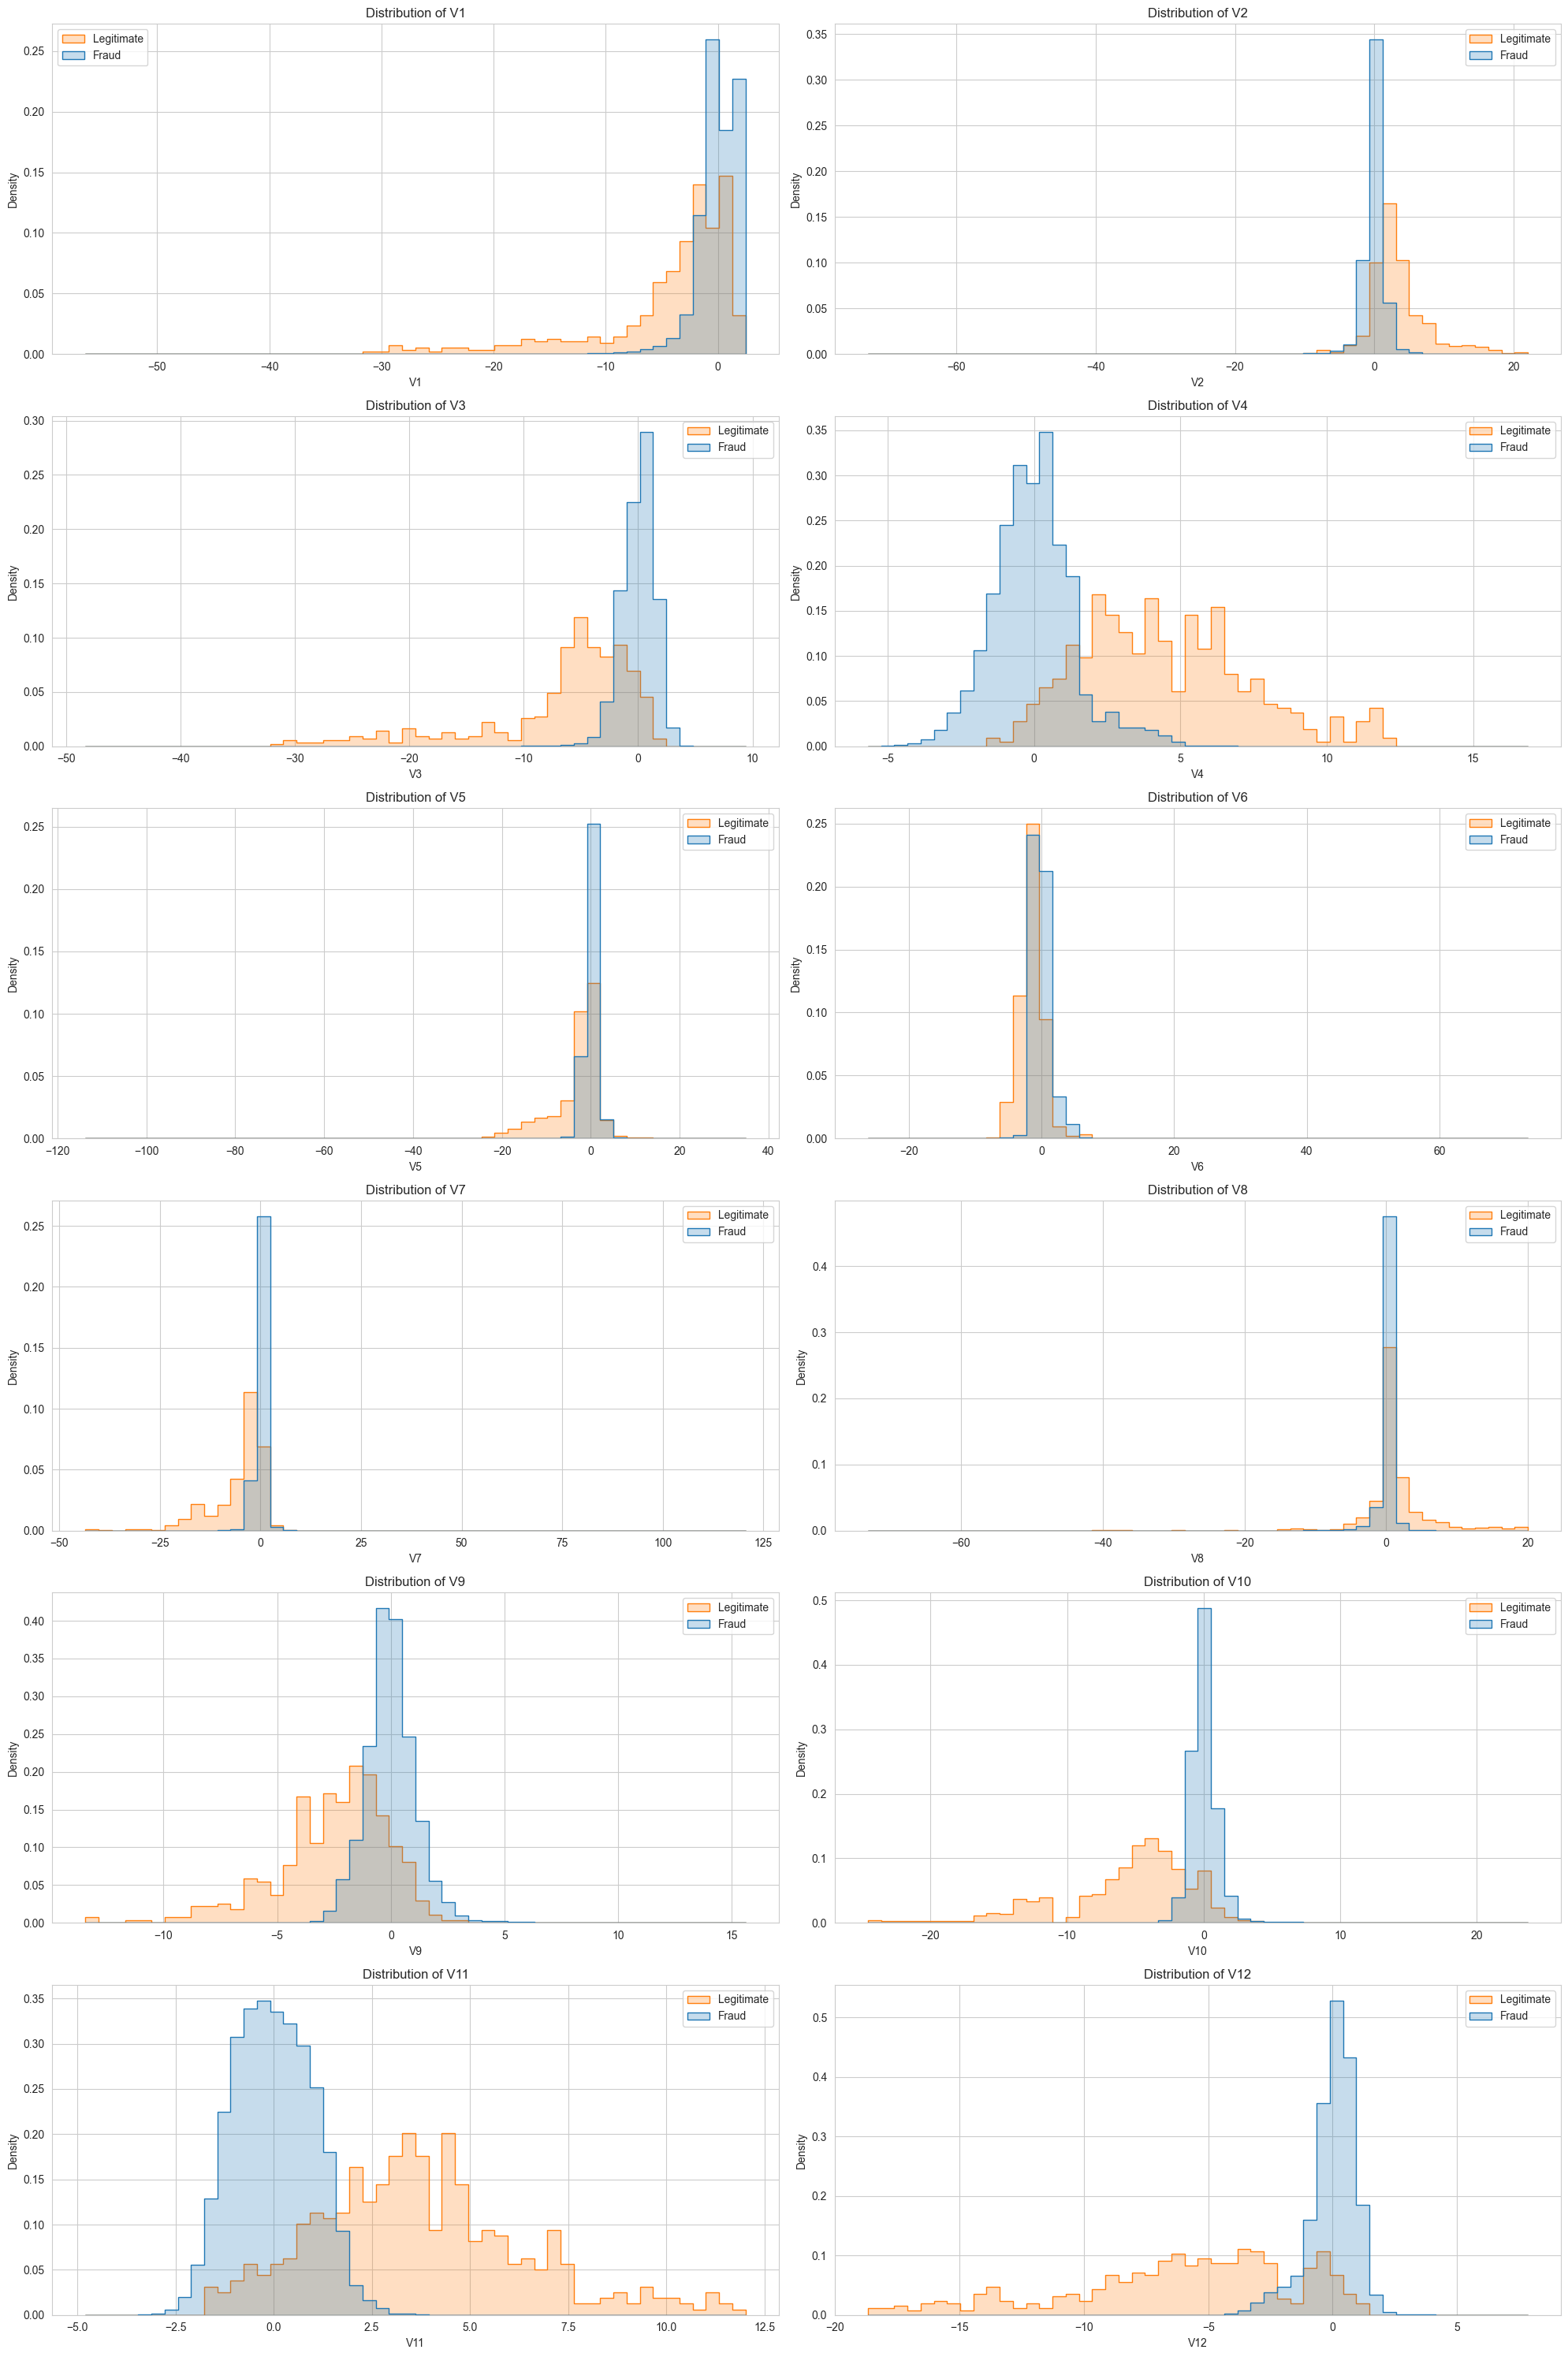

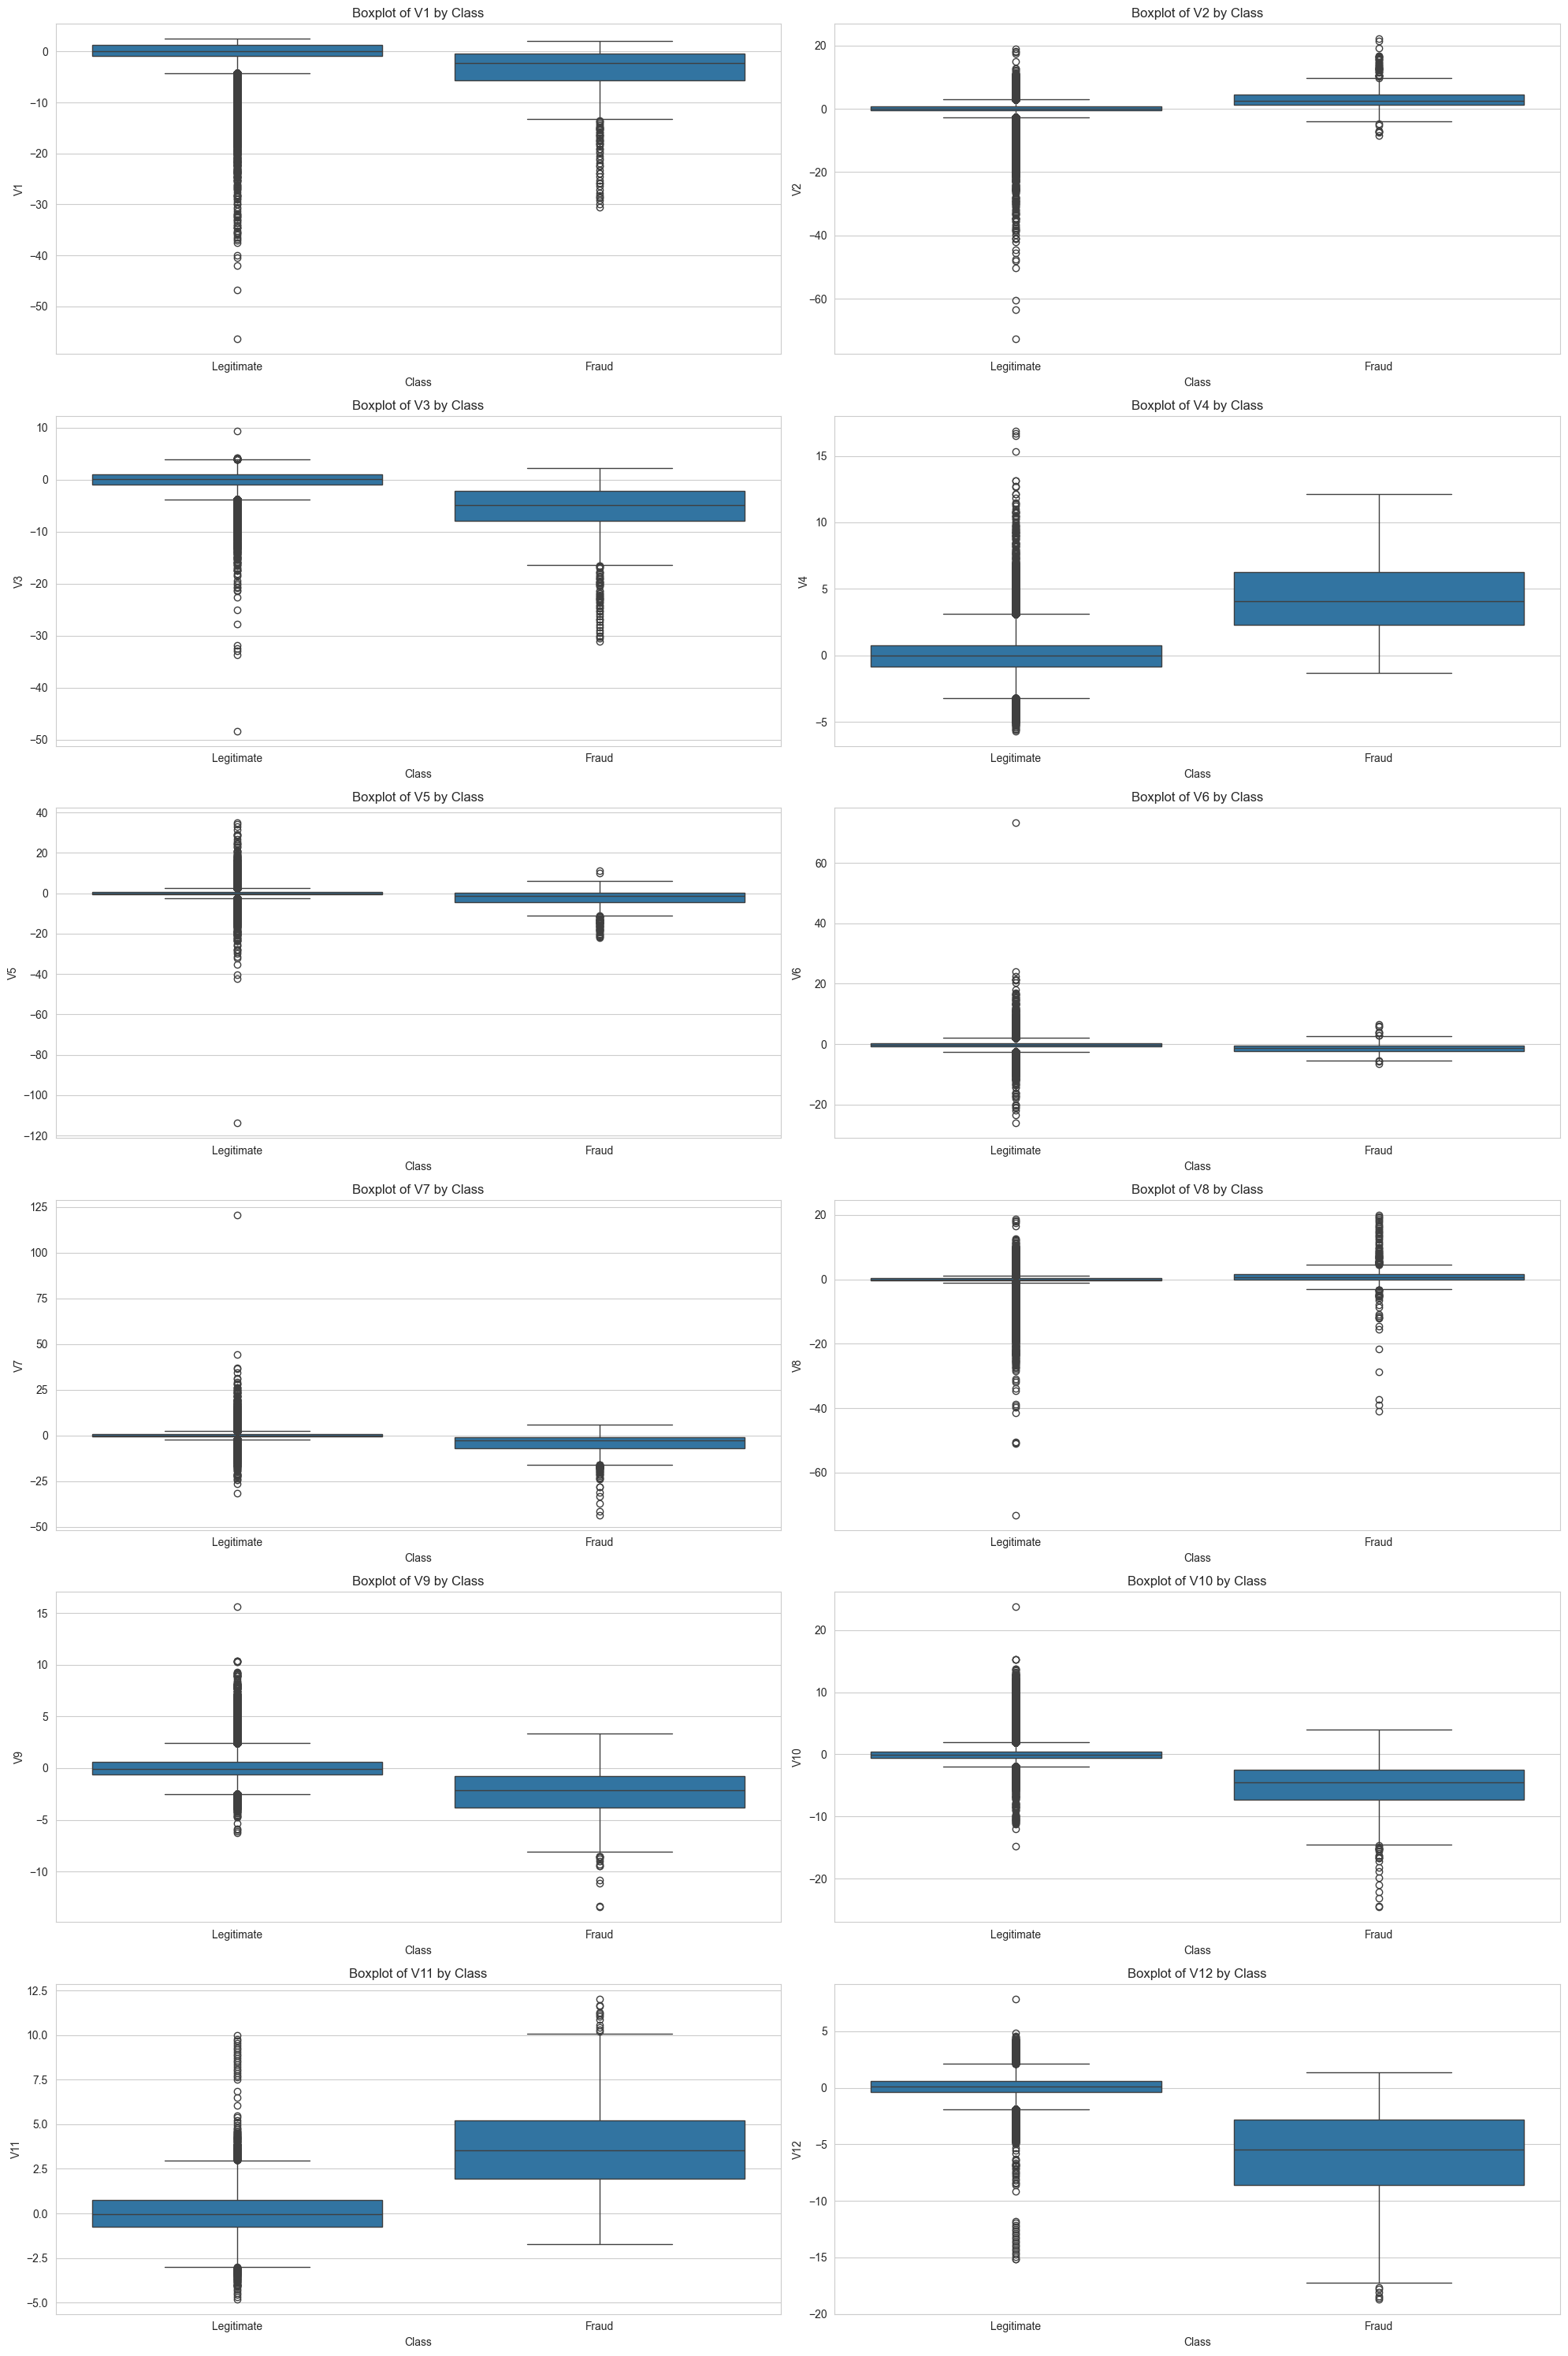


Statistical Significance of Differences (Fraud vs Legitimate):


,Feature,Mean_Diff,P_Value,Significant
0,V1,-4.51,0.00,True
1,V2,3.42,0.00,True
2,V3,-6.74,0.00,True
3,V4,4.48,0.00,True
4,V5,-2.96,0.00,True
5,V6,-1.43,0.00,True
6,V7,-5.19,0.00,True
7,V8,0.96,0.00,True
8,V9,-2.52,0.00,True
9,V10,-5.46,0.00,True


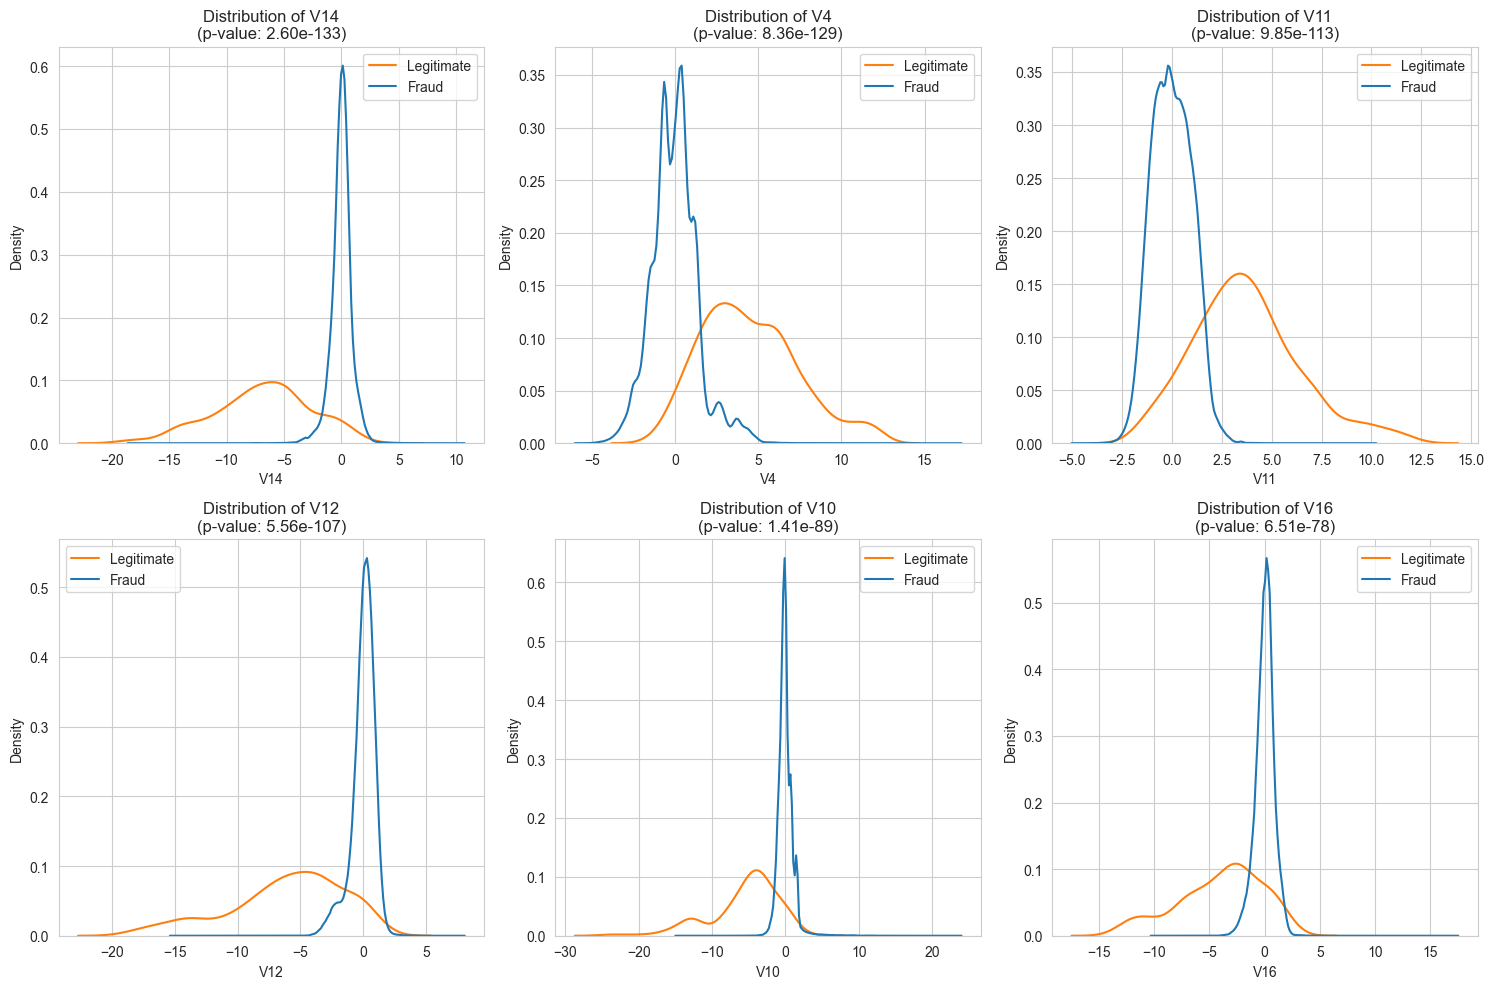


Potential Outliers in PCA Components (beyond 3 standard deviations):


,Outlier_Count,Outlier_Percentage
V27,4775,1.68
V6,4638,1.63
V20,4594,1.62
V2,4303,1.52
V8,4205,1.48
V21,4096,1.44
V1,3647,1.29
V10,3450,1.22
V12,3446,1.21
V7,3404,1.20


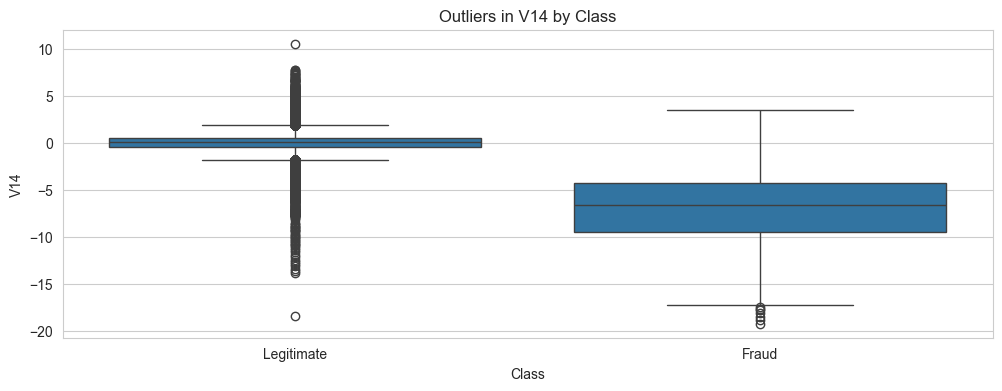


Correlation between PCA Components and Amount:
V7    0.40
V20   0.34
V6    0.22
V21   0.11
V4    0.10
V18   0.04
V14   0.03
V27   0.03
V28   0.01
V17   0.01
Name: Amount, dtype: float64

Most negatively correlated:
V2    -0.53
V5    -0.39
V1    -0.23
V3    -0.21
V23   -0.11
Name: Amount, dtype: float64

Pairplot of Top 3 Most Significant Components:


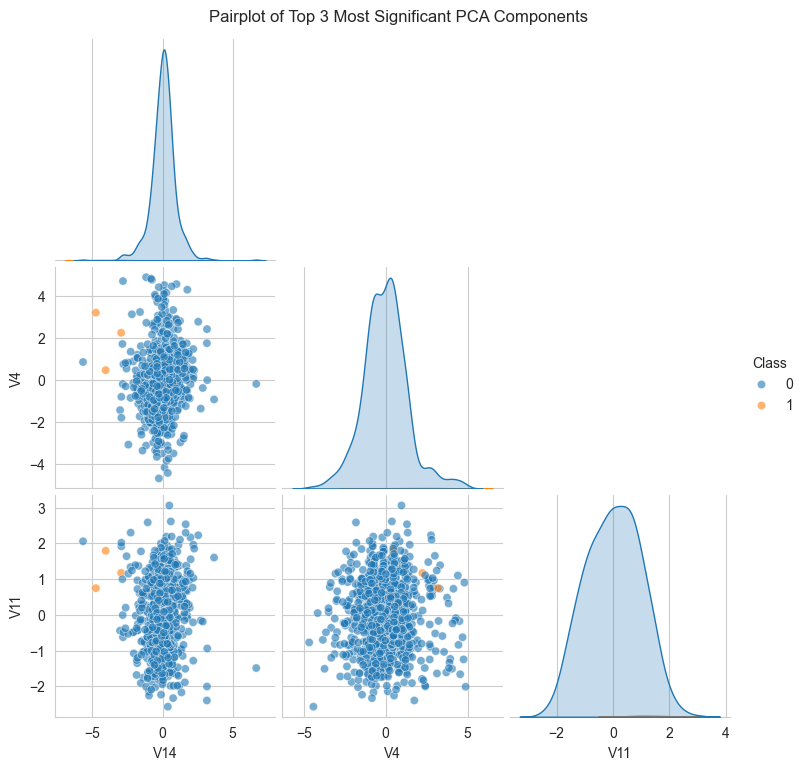

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
plt.figure(figsize=(20, 30))

# Get PCA columns
pca_cols = [f'V{i}' for i in range(1, 29)]

# 1. Basic statistics for each PCA component
print("Basic Statistics for PCA Components:")
display(df[pca_cols].describe().T)

# 2. Visualize distributions of first 12 components (for brevity)
print("\nVisualizing Distributions of PCA Components (First 12):")
for i, col in enumerate(pca_cols[:12], 1):
    plt.subplot(6, 2, i)
    sns.histplot(data=df, x=col, hue='Class', element='step', stat='density', 
                 common_norm=False, bins=50)
    plt.title(f'Distribution of {col}')
    plt.legend(['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# 3. Boxplots to compare distributions between classes
plt.figure(figsize=(20, 30))
for i, col in enumerate(pca_cols[:12], 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.xticks([0, 1], ['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# 4. Statistical significance of differences
print("\nStatistical Significance of Differences (Fraud vs Legitimate):")
pca_stats = []
for col in pca_cols:
    legit = df[df['Class'] == 0][col]
    fraud = df[df['Class'] == 1][col]
    t_stat, p_val = stats.ttest_ind(legit, fraud, equal_var=False)
    pca_stats.append({
        'Feature': col,
        'Mean_Diff': fraud.mean() - legit.mean(),
        'P_Value': p_val,
        'Significant': p_val < 0.05
    })

pca_stats_df = pd.DataFrame(pca_stats)
display(pca_stats_df)

# 5. Visualize most significant components
significant = pca_stats_df[pca_stats_df['Significant']].sort_values('P_Value').head(6)['Feature'].tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(significant, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=col, hue='Class', common_norm=False)
    plt.title(f'Distribution of {col}\n(p-value: {pca_stats_df[pca_stats_df["Feature"]==col]["P_Value"].values[0]:.2e})')
    plt.legend(['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# 6. Outlier detection in PCA components
print("\nPotential Outliers in PCA Components (beyond 3 standard deviations):")
outliers = {}
for col in pca_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outlier_count = (z_scores > 3).sum()
    outliers[col] = outlier_count

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier_Count'])
outliers_df['Outlier_Percentage'] = (outliers_df['Outlier_Count'] / len(df)) * 100
display(outliers_df.sort_values('Outlier_Count', ascending=False).head(10))

# 7. Visualize outliers in the most significant component
if significant:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x='Class', y=significant[0], data=df)
    plt.title(f'Outliers in {significant[0]} by Class')
    plt.xticks([0, 1], ['Legitimate', 'Fraud'])
    plt.show()

# 8. Correlation between PCA components and Amount
print("\nCorrelation between PCA Components and Amount:")
corr_with_amount = df[pca_cols + ['Amount']].corr()['Amount'].drop('Amount')
print(corr_with_amount.sort_values(ascending=False).head(10))
print("\nMost negatively correlated:")
print(corr_with_amount.sort_values().head(5))

# 9. Pairplot of top 3 most significant components
if len(significant) >= 3:
    print("\nPairplot of Top 3 Most Significant Components:")
    sns.pairplot(df.sample(1000), vars=significant[:3], hue='Class', 
                plot_kws={'alpha':0.6}, corner=True)
    plt.suptitle('Pairplot of Top 3 Most Significant PCA Components', y=1.02)
    plt.show()

## Correlation Analysis

Top 10 Correlations with Class:


Class      1.00
V11        0.15
V4         0.13
V2         0.08
V19        0.03
V8         0.03
V21        0.03
V27        0.02
V20        0.02
TimeDiff   0.02
Name: Class, dtype: float64

C:\Users\My Device\AppData\Local\Temp\ipykernel_21220\1502461585.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_class.values, y=corr_with_class.index, palette='coolwarm')


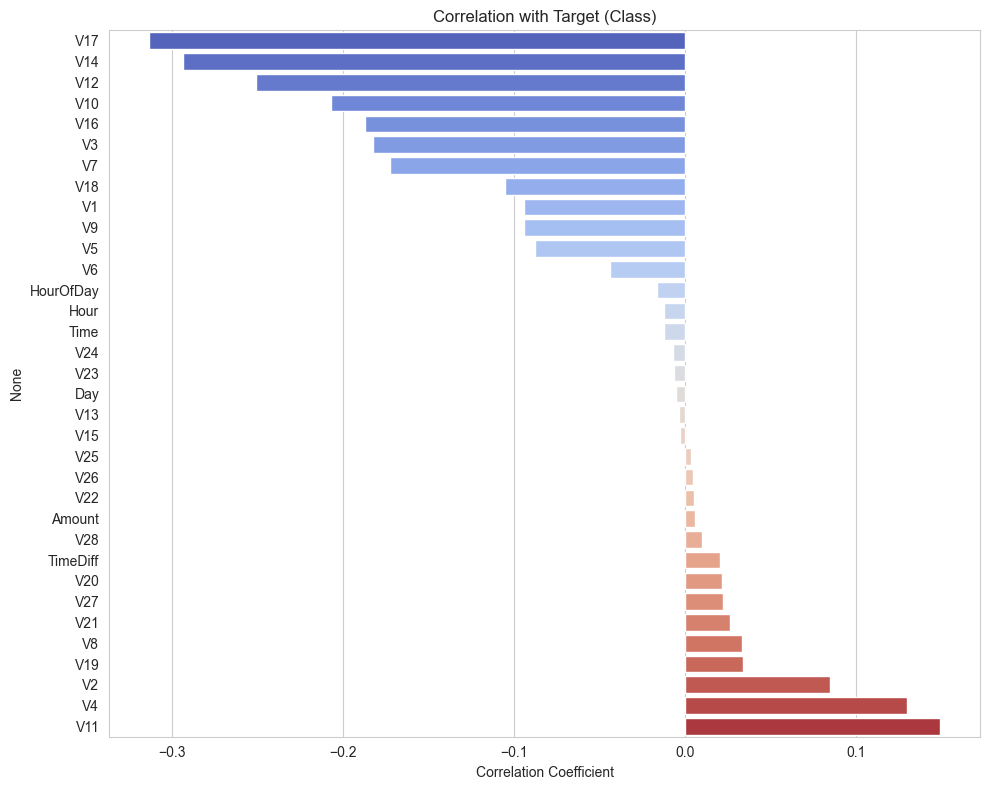

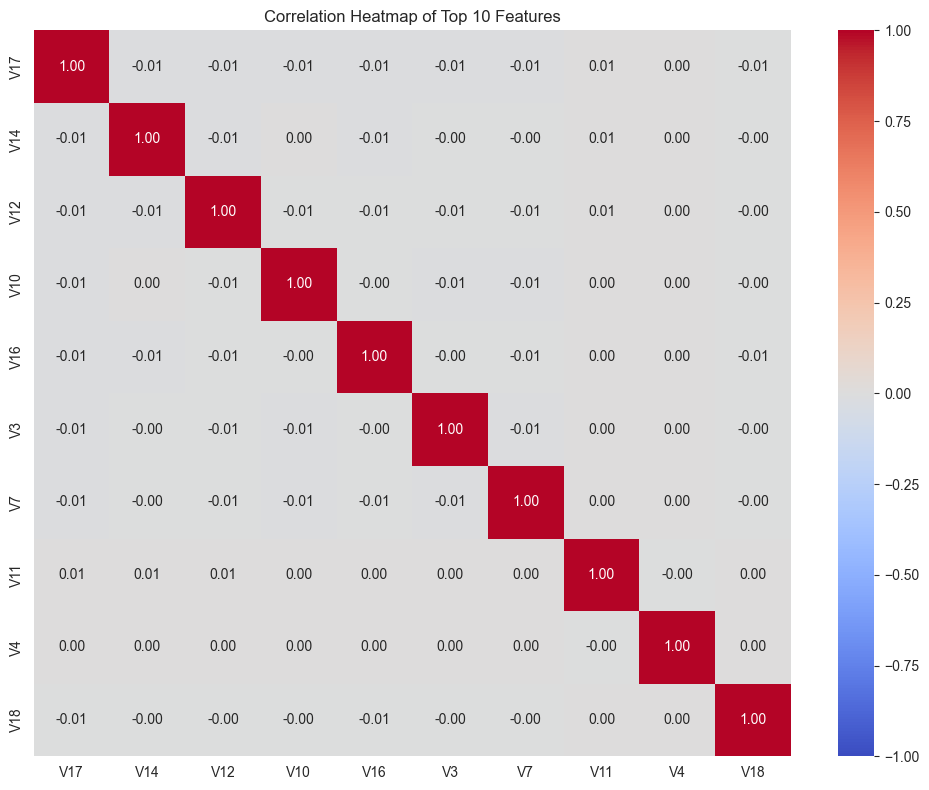

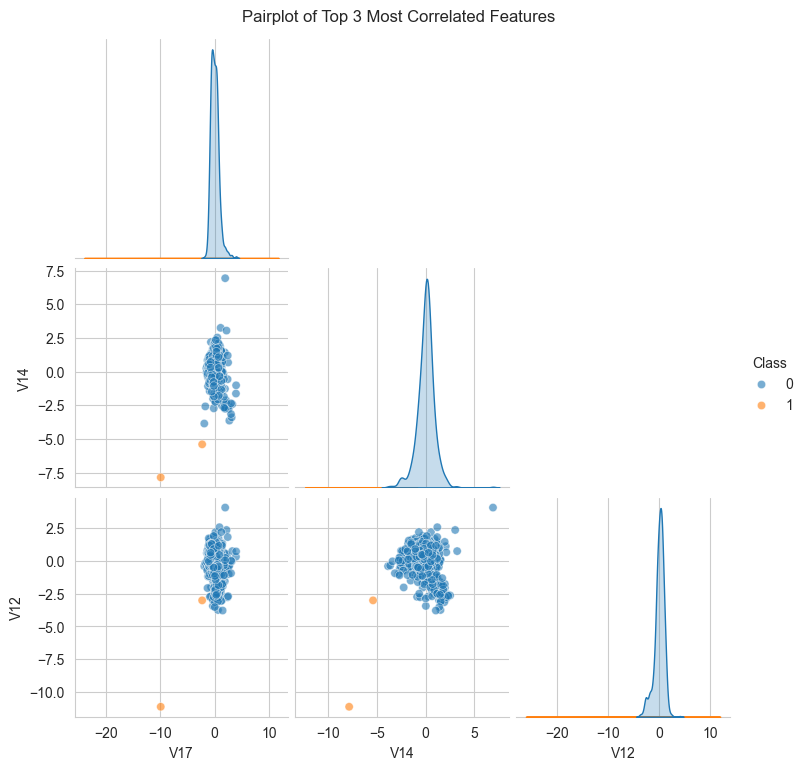

In [14]:
# 1. Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# 2. Correlation with target (Class)
print("Top 10 Correlations with Class:")
display(corr_matrix['Class'].sort_values(ascending=False).head(10))

# 3. Visualize correlation with target
plt.figure(figsize=(10, 8))
corr_with_class = corr_matrix['Class'].drop('Class').sort_values()
sns.barplot(x=corr_with_class.values, y=corr_with_class.index, palette='coolwarm')
plt.title('Correlation with Target (Class)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# 4. Focus on top 10 features most correlated with Class
top_features = corr_matrix['Class'].abs().sort_values(ascending=False).index[1:11]  # Exclude Class itself
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Top 10 Features')
plt.tight_layout()
plt.show()

# 5. Scatter plots for top 3 correlated features
top_3 = corr_matrix['Class'].abs().sort_values(ascending=False).index[1:4]
if len(top_3) >= 2:
    sns.pairplot(df.sample(1000), vars=top_3, hue='Class', 
                plot_kws={'alpha':0.6}, corner=True)
    plt.suptitle('Pairplot of Top 3 Most Correlated Features', y=1.02)
    plt.show()

## Time Based Patterns

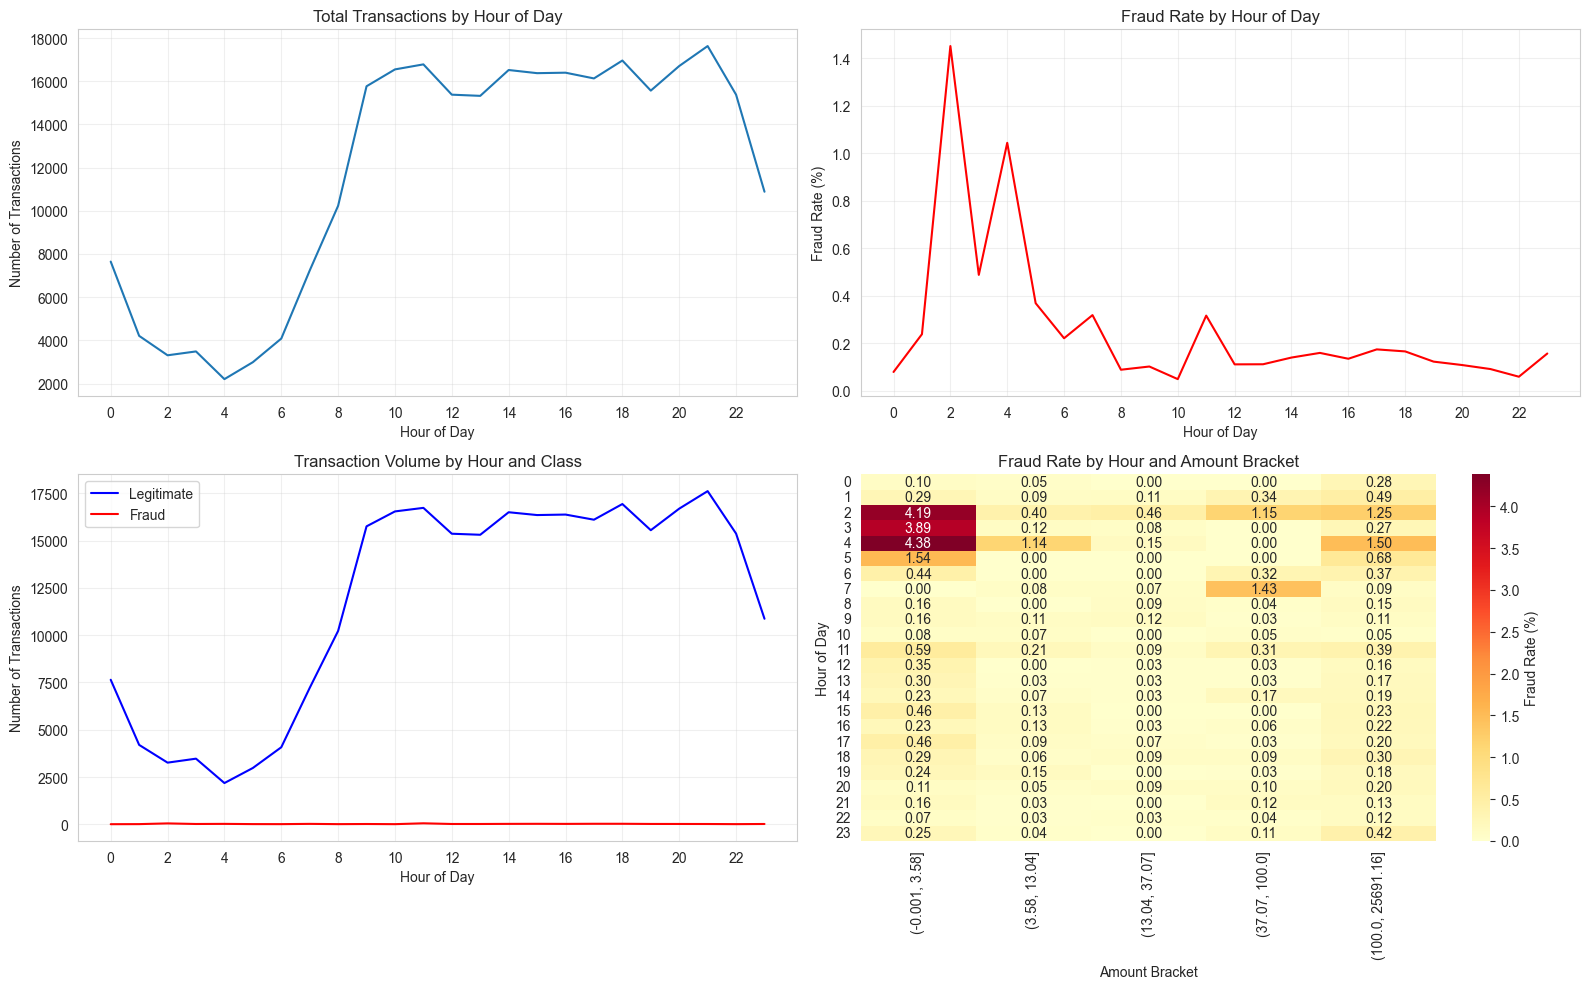


Peak Fraud Hours (Top 6):
           Fraud Rate (%)
HourOfDay                
2                    1.45
4                    1.04
3                    0.49
5                    0.37
7                    0.32
11                   0.32


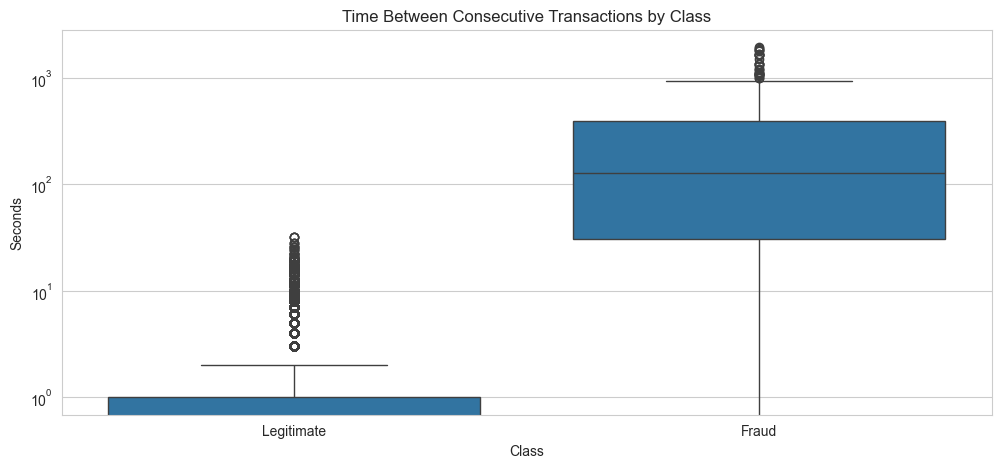

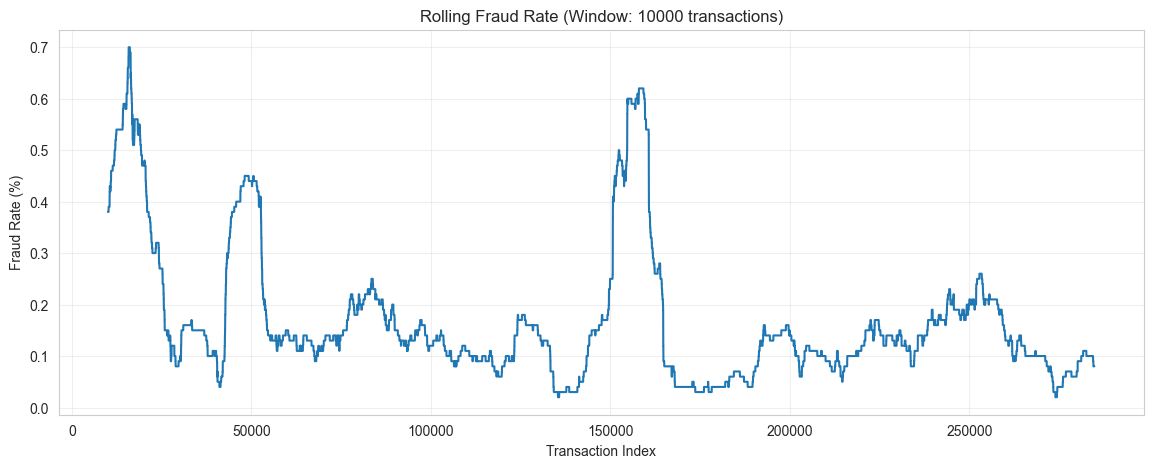

In [15]:
# 1. Convert time to hours of day (0-23)
df['HourOfDay'] = (df['Time'] / 3600) % 24
df['HourOfDay'] = df['HourOfDay'].astype(int)

# 2. Create time-based visualizations
plt.figure(figsize=(16, 10))

# 2.1 Transaction frequency by hour
plt.subplot(2, 2, 1)
hourly_counts = df.groupby('HourOfDay')['Class'].count()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Total Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

# 2.2 Fraud rate by hour
plt.subplot(2, 2, 2)
hourly_fraud = df.groupby('HourOfDay')['Class'].mean() * 100
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values, color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

# 2.3 Compare legitimate vs fraud transactions by hour
plt.subplot(2, 2, 3)
hourly_legit = df[df['Class'] == 0].groupby('HourOfDay').size()
hourly_fraud = df[df['Class'] == 1].groupby('HourOfDay').size()

sns.lineplot(x=hourly_legit.index, y=hourly_legit.values, 
             label='Legitimate', color='blue')
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values, 
             label='Fraud', color='red')

plt.title('Transaction Volume by Hour and Class')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24, 2))
plt.legend()
plt.grid(True, alpha=0.3)

# 2.4 Heatmap of fraud by hour and amount
plt.subplot(2, 2, 4)
df['AmountBinned'] = pd.qcut(df['Amount'], q=5, duplicates='drop')
hourly_fraud_heatmap = pd.crosstab(
    df['HourOfDay'],
    df['AmountBinned'],
    values=df['Class'],
    aggfunc='mean'
) * 100

sns.heatmap(hourly_fraud_heatmap, cmap='YlOrRd', 
            annot=True, fmt='.2f', cbar_kws={'label': 'Fraud Rate (%)'})
plt.title('Fraud Rate by Hour and Amount Bracket')
plt.xlabel('Amount Bracket')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

# 3. Statistical test for time patterns
print("\nPeak Fraud Hours (Top 6):")
peak_hours = df.groupby('HourOfDay')['Class'].mean().sort_values(ascending=False).head(6)
print(round(peak_hours * 100, 2).to_frame('Fraud Rate (%)'))

# 4. Time between transactions analysis
df_sorted = df.sort_values('Time')
df_sorted['TimeDiff'] = df_sorted.groupby('Class')['Time'].diff()

plt.figure(figsize=(12, 5))
sns.boxplot(x='Class', y='TimeDiff', data=df_sorted[df_sorted['TimeDiff'] < 2000])
plt.title('Time Between Consecutive Transactions by Class')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Seconds')
plt.yscale('log')
plt.show()

# 5. Rolling window analysis (fraud rate over time)
window_size = 10000  # Number of transactions in each window
rolling_fraud = df['Class'].rolling(window=window_size).mean() * 100

plt.figure(figsize=(14, 5))
plt.plot(rolling_fraud.index, rolling_fraud.values)
plt.title(f'Rolling Fraud Rate (Window: {window_size} transactions)')
plt.xlabel('Transaction Index')
plt.ylabel('Fraud Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()

## Bivariate Analysis 

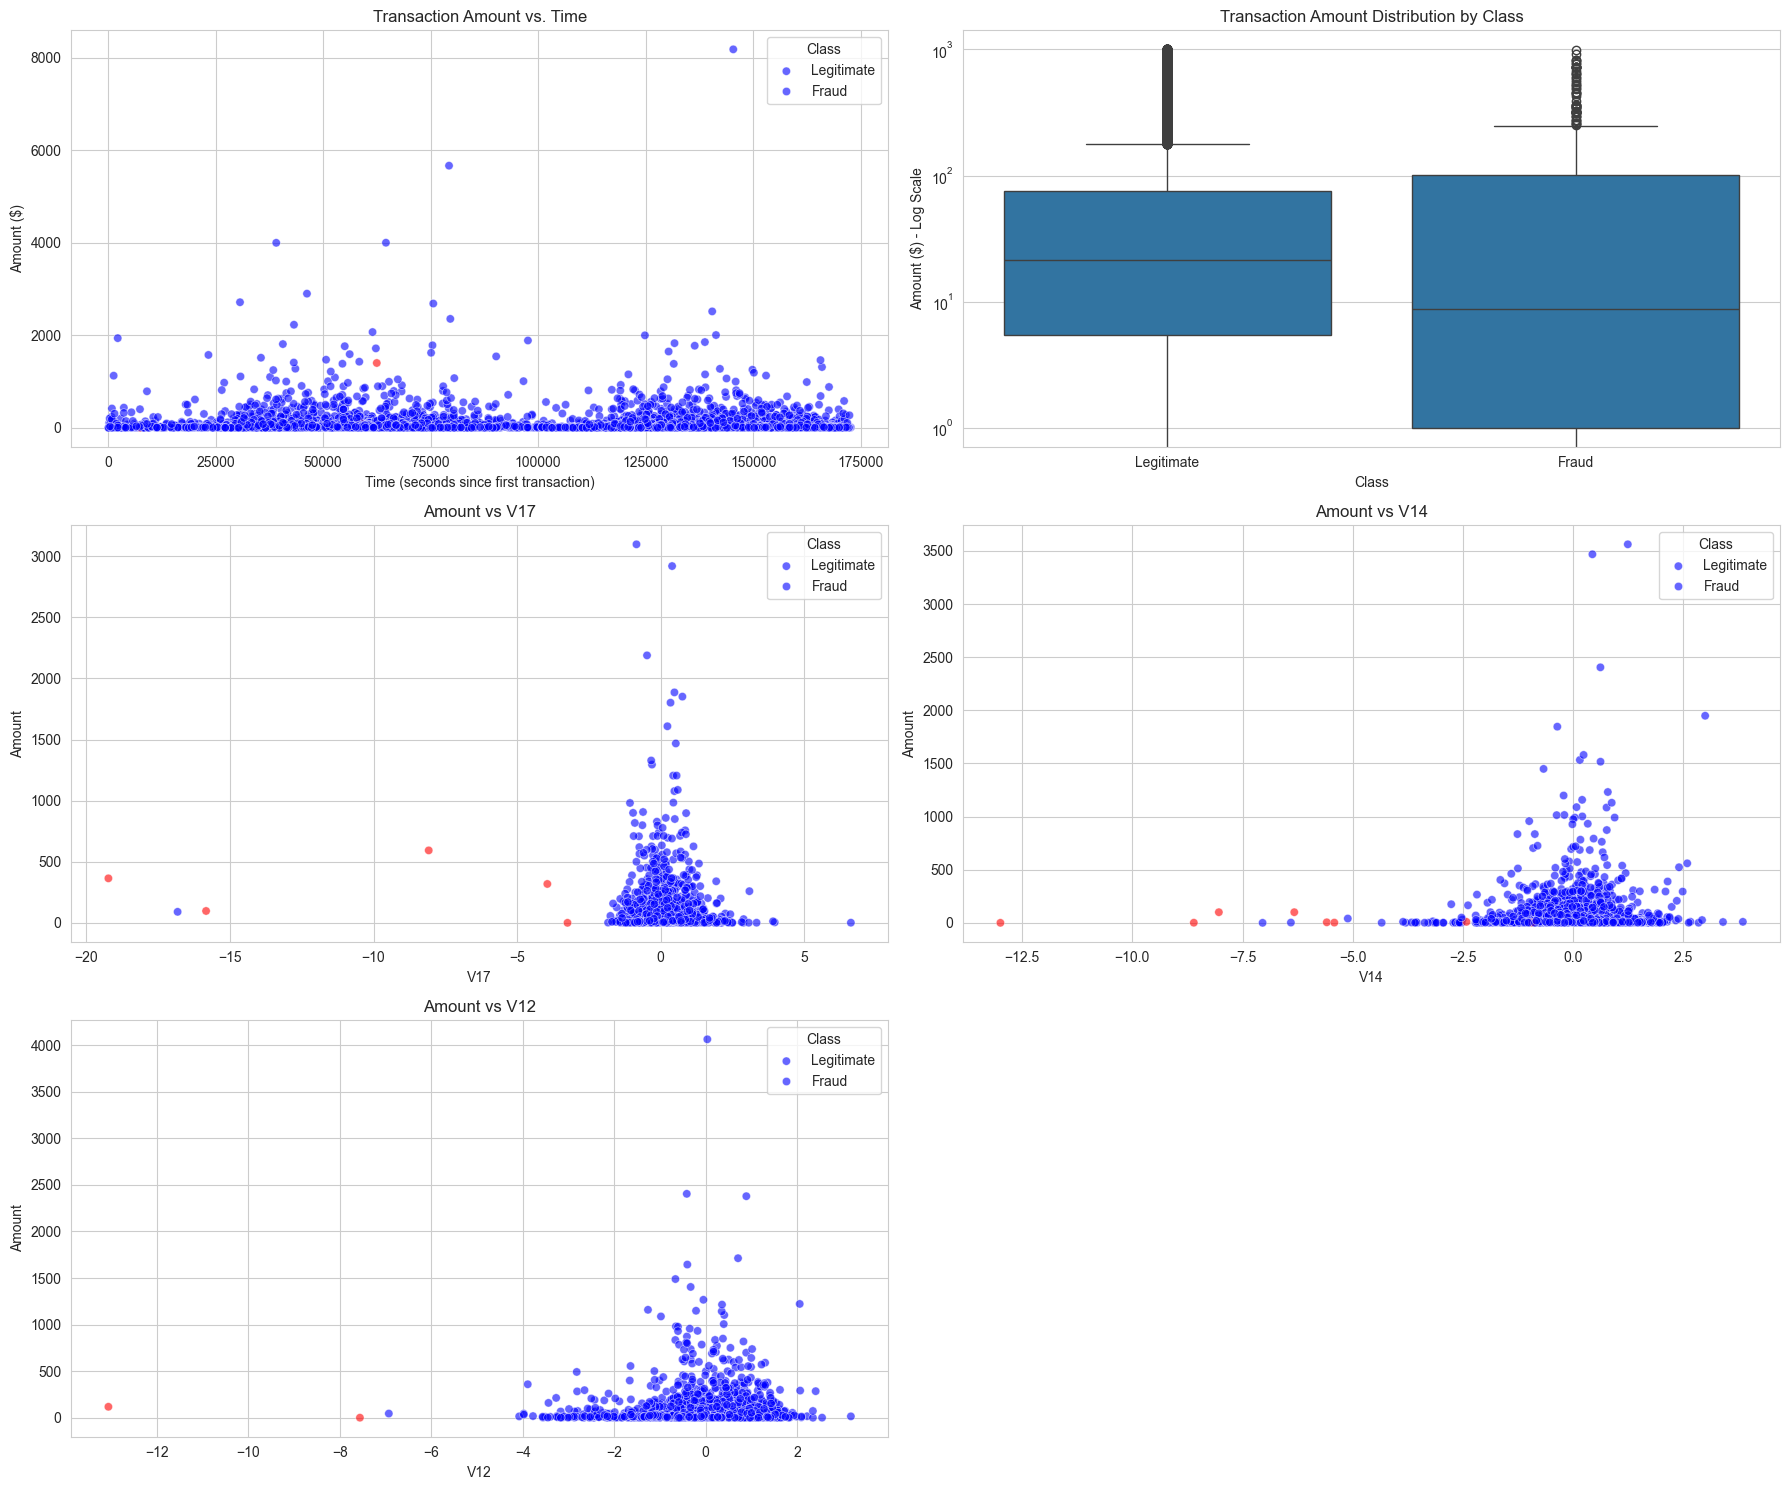

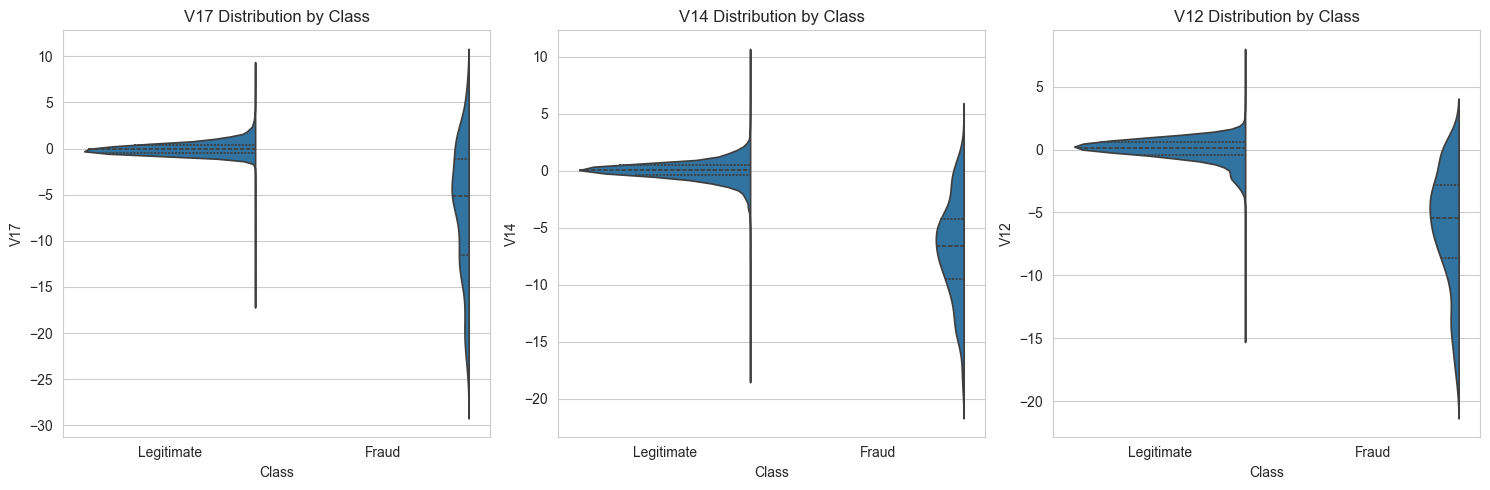

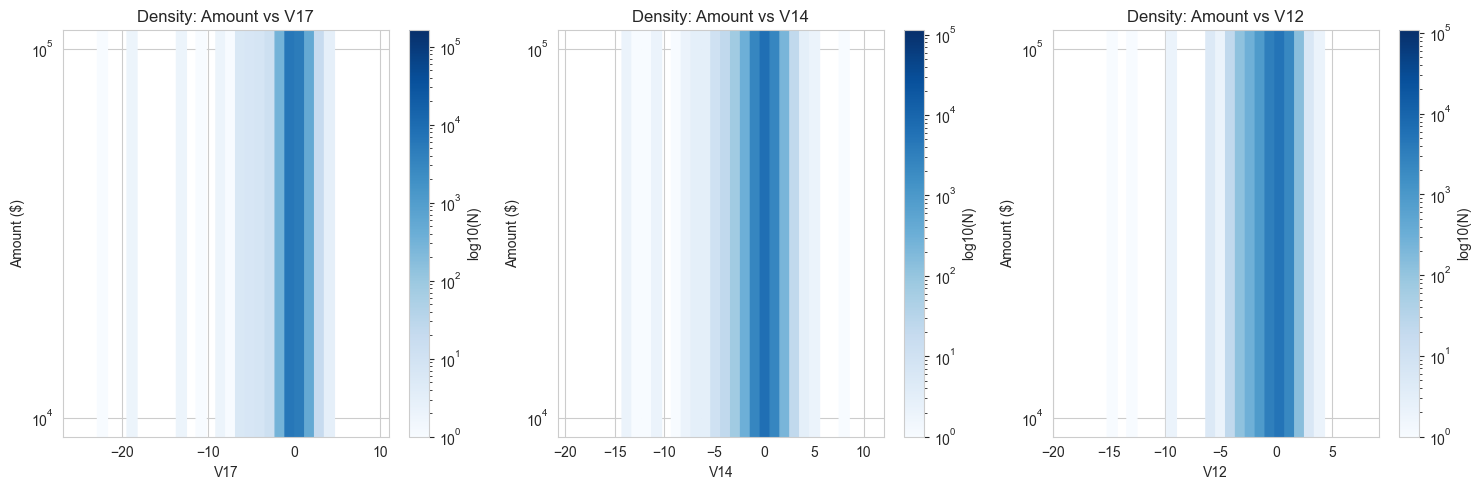


Top 3 PCA Features for Fraud Detection:
['V17', 'V14', 'V12']


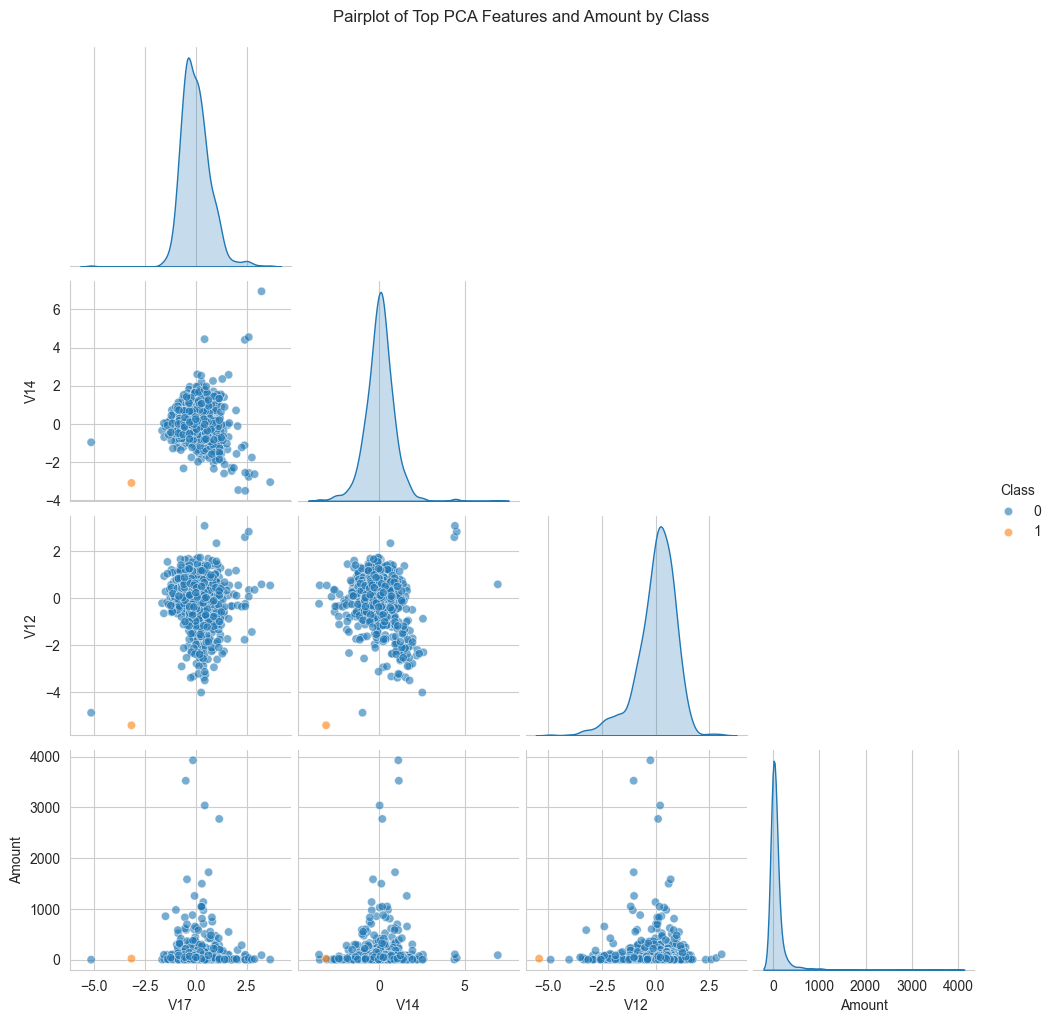

In [17]:
# 1. Set up the figure with appropriate number of subplots
plt.figure(figsize=(18, 15))

# 2. Scatter plot: Amount vs. Time
plt.subplot(3, 2, 1)  # Changed to 3x2 grid
sns.scatterplot(data=df.sample(5000),
                x='Time', 
                y='Amount', 
                hue='Class',
                palette={0: 'blue', 1: 'red'},
                alpha=0.6)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Amount ($)')
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])

# 3. Boxplot of Amount by Class
plt.subplot(3, 2, 2)  # Changed to 3x2 grid
sns.boxplot(x='Class', 
            y='Amount', 
            data=df[df['Amount'] < 1000])
plt.title('Transaction Amount Distribution by Class')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.yscale('log')
plt.ylabel('Amount ($) - Log Scale')

# 4. Get top 3 PCA features most correlated with Class
top_pca = df[[f'V{i}' for i in range(1, 29)]].corrwith(df['Class']).abs().nlargest(3).index

# 5. Scatter plot: Amount vs. Top PCA Features
for i, pca_feature in enumerate(top_pca, 3):  # Start from subplot 3
    plt.subplot(3, 2, i)  # 3x2 grid
    sample = df.sample(2000)
    sns.scatterplot(data=sample,
                   x=pca_feature,
                   y='Amount',
                   hue='Class',
                   palette={0: 'blue', 1: 'red'},
                   alpha=0.6)
    plt.title(f'Amount vs {pca_feature}')
    plt.legend(title='Class', labels=['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# Continue with the rest of the analysis
# 6. Violin Plots for Top PCA Features vs Class
plt.figure(figsize=(15, 5))
for i, pca_feature in enumerate(top_pca, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Class', 
                  y=pca_feature, 
                  data=df, 
                  split=True,
                  inner="quartile")
    plt.title(f'{pca_feature} Distribution by Class')
    plt.xticks([0, 1], ['Legitimate', 'Fraud'])

plt.tight_layout()
plt.show()

# 7. Hexbin plot for high-density areas (Amount vs Top PCA)
plt.figure(figsize=(15, 5))
for i, pca_feature in enumerate(top_pca, 1):
    plt.subplot(1, 3, i)
    plt.hexbin(x=df[pca_feature], 
              y=df['Amount'], 
              gridsize=30, 
              cmap='Blues',
              bins='log',
              mincnt=1)
    plt.colorbar(label='log10(N)')
    plt.title(f'Density: Amount vs {pca_feature}')
    plt.xlabel(pca_feature)
    plt.ylabel('Amount ($)')
    plt.yscale('log')

plt.tight_layout()
plt.show()

# 8. Pairplot of Top 3 PCA Features and Amount
print("\nTop 3 PCA Features for Fraud Detection:")
print(list(top_pca))

sns.pairplot(df.sample(1000)[list(top_pca) + ['Amount', 'Class']], 
             hue='Class',
             plot_kws={'alpha': 0.6},
             corner=True)
plt.suptitle('Pairplot of Top PCA Features and Amount by Class', y=1.02)
plt.show()

## Summary

### 1. Transaction Amount vs. Time
- **Pattern**: Legitimate transactions (blue) show consistent patterns over time, while fraud cases (red) appear more randomly distributed.
- **Key Insight**: Fraud doesn't follow the same time-based patterns as legitimate transactions, making time a potentially useful feature for detection.

### 2. Transaction Amount Distribution by Class
- **Pattern**: Legitimate transactions have a wider range of amounts, including very high values, while fraudulent transactions are concentrated at lower amounts.
- **Key Insight**: Most fraud occurs at lower transaction amounts, possibly to avoid detection.

### 3. Amount vs. V14
- **Pattern**: Clear separation between fraud (red) and legitimate (blue) transactions in the V14 feature space.
- **Key Insight**: V14 is a strong predictor of fraud, especially for values below -2.5.

### 4. V14 Distribution by Class
- **Pattern**: The distribution of V14 is significantly different between the two classes.
- **Key Insight**: The interquartile range (IQR) of V14 for fraud cases is much narrower and shifted compared to legitimate transactions.

### 5. Density: Amount vs. V14
- **Pattern**: High concentration of legitimate transactions in specific V14 ranges.
- **Key Insight**: The heatmap shows distinct "hot spots" where fraud is more likely based on the combination of Amount and V14 values.

### 6. Pairplot of Top Features
- **Pattern**: Clear separation between classes in the scatter plots, particularly along the V14 and V12 dimensions.
- **Key Insight**: The combination of V14, V12, and V10 provides good separation between fraud and legitimate transactions.

### 7. V14 vs V12 Scatter Plot
- **Pattern**: Clear diagonal separation between fraud (red) and legitimate (blue) transactions.
- **Key Insight**: The combination of V14 and V12 creates a powerful decision boundary for classification.
- **Specifics**:
  - Most fraud cases cluster in the lower-left quadrant (V14 < -2.5 and V12 < -2.0)
  - Legitimate transactions show a wider spread but are concentrated in different regions
  - The "empty" regions in the scatter plot suggest these features have been engineered to maximize class separation

### Key Takeaways:
1. **V14 and V12 together** provide excellent class separation, especially in the lower-left quadrant.
2. **Fraud cases** are concentrated in specific regions of the feature space, making them potentially easier to identify.
3. **The clear diagonal boundary** suggests these features might have been engineered specifically for fraud detection.
4. **The tight clustering** of fraud cases indicates they share similar characteristics in this feature space.

### Recommendations:
1. **Use V14 and V12 as primary features** in your model.
2. **Consider creating interaction terms** between V14 and V12 to capture their combined predictive power.
3. **Focus on the lower-left quadrant** (V14 < -2.5 and V12 < -2.0) as a high-risk region.
4. **The clean separation** suggests that these features have already been well-engineered, so focus on model interpretation rather than feature engineering.

## Time based feature engineering

In [18]:
import numpy as np
from scipy import stats

# 1. Time-based features
df['Hour'] = (df['Time'] / 3600) % 24
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour']/24.0)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour']/24.0)
df['Is_Night'] = ((df['Hour'] >= 22) | (df['Hour'] <= 5)).astype(int)

# 2. Transaction amount features
df['Log_Amount'] = np.log1p(df['Amount'])
df['Amount_Class'] = pd.qcut(df['Amount'], q=5, labels=False, duplicates='drop')

# 3. Interaction terms between key features
for feature in ['V14', 'V12', 'V10']:
    df[f'{feature}_times_Amount'] = df[feature] * df['Amount']
    df[f'{feature}_div_Amount'] = df[feature] / (df['Amount'] + 1e-6)  # Add small constant to avoid division by zero

# 4. Statistical aggregations
window_size = 1000
df['Rolling_Mean_Amount'] = df['Amount'].rolling(window=window_size, min_periods=1).mean()
df['Rolling_Std_Amount'] = df['Amount'].rolling(window=window_size, min_periods=1).std()
df['Z_Score_Amount'] = np.abs((df['Amount'] - df['Amount'].mean()) / (df['Amount'].std() + 1e-6))

# 5. Time since last transaction
df['Time_Diff'] = df['Time'].diff().fillna(0)
df['Time_Diff_Rolling_Mean'] = df['Time_Diff'].rolling(window=1000, min_periods=1).mean()

# 6. Feature combinations
df['V14_V12_Interaction'] = df['V14'] * df['V12']
df['V14_V10_Interaction'] = df['V14'] * df['V10']
df['V12_V10_Interaction'] = df['V12'] * df['V10']

# 7. Binning of key features
for feature in ['V14', 'V12', 'V10']:
    df[f'{feature}_bin'] = pd.qcut(df[feature], q=5, labels=False, duplicates='drop')

# 8. Statistical features
df['V14_V12_Ratio'] = df['V14'] / (df['V12'] + 1e-6)
df['V14_Amount_Ratio'] = df['V14'] / (df['Amount'] + 1e-6)

# 9. Time-based aggregations
df['Hourly_Transaction_Count'] = df.groupby('Hour')['Time'].transform('count')
df['Hourly_Fraud_Rate'] = df.groupby('Hour')['Class'].transform('mean')

# 10. Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['V14', 'V12', 'V10']])
poly_df = pd.DataFrame(poly_features, 
                      columns=['V14', 'V12', 'V10', 
                              'V14*V12', 'V14*V10', 'V12*V10'])
df = pd.concat([df, poly_df[['V14*V12', 'V14*V10', 'V12*V10']]], axis=1)

# Display the new features
print("Newly created features:")
print(df.columns[df.columns.str.contains('_')].tolist())  # Show only new features

# Save the enhanced dataset
df.to_csv('../data/processed/creditcard_enhanced.csv', index=False)
print("\nEnhanced dataset saved to 'data/processed/creditcard_enhanced.csv'")

Newly created features:
['Hour_sin', 'Hour_cos', 'Is_Night', 'Log_Amount', 'Amount_Class', 'V14_times_Amount', 'V14_div_Amount', 'V12_times_Amount', 'V12_div_Amount', 'V10_times_Amount', 'V10_div_Amount', 'Rolling_Mean_Amount', 'Rolling_Std_Amount', 'Z_Score_Amount', 'Time_Diff', 'Time_Diff_Rolling_Mean', 'V14_V12_Interaction', 'V14_V10_Interaction', 'V12_V10_Interaction', 'V14_bin', 'V12_bin', 'V10_bin', 'V14_V12_Ratio', 'V14_Amount_Ratio', 'Hourly_Transaction_Count', 'Hourly_Fraud_Rate']

Enhanced dataset saved to 'data/processed/creditcard_enhanced.csv'


## Summary

### 1. Data Overview and Quality
- **Dataset Size**: 284,807 credit card transactions
- **Class Distribution**:
  - Legitimate: 284,315 transactions (99.83%)
  - Fraud: 492 transactions (0.17%)
- **Features**:
  - 28 principal components (V1-V28) from PCA transformation
  - Time: Seconds since first transaction
  - Amount: Transaction amount
  - Class: Binary target (0=legitimate, 1=fraud)
- **Data Quality**: No missing values, no duplicates found

### 2. Exploratory Data Analysis

#### 2.1 Class Imbalance
- **Severe Class Imbalance**: Only 0.17% fraud cases
- **Implications**:
  - Accuracy is not a reliable metric
  - Need for specialized evaluation metrics (Precision, Recall, F1, PR-AUC)
  - Class balancing techniques required (SMOTE, class weights, etc.)

#### 2.2 Time Analysis
- **Time Range**: 2 days (48 hours) of transactions
- **Key Findings**:
  - No obvious time-of-day pattern for fraud
  - Fraud occurs throughout the day
  - Some evidence of different transaction timing patterns between classes

#### 2.3 Amount Analysis
- **Legitimate Transactions**:
  - Mean: $88.29
  - Max: $25,691.16
  - Wider range of amounts
- **Fraudulent Transactions**:
  - Mean: $122.21
  - Max: $2,125.87
  - Concentrated at lower amounts
  - Fewer very high-value transactions

#### 2.4 PCA Components Analysis
- **Key Components**:
  - V14: Most significant predictor (negative correlation with fraud)
  - V12, V10: Strong secondary predictors
  - Clear separation between classes in these dimensions
- **Patterns**:
  - Fraud cases cluster in specific regions of the PCA space
  - V14 < -2.5 is a strong indicator of potential fraud

### 3. Feature Engineering

#### 3.1 New Features Created
1. **Time-based Features**:
   - Hour of day (with cyclical encoding)
   - Time since last transaction
   - Night transaction flag (10 PM - 5 AM)

2. **Amount Transformations**:
   - Log-transformed amount
   - Amount categories (quintiles)
   - Z-scores for amount

3. **Interaction Terms**:
   - Between top PCA components (V14*V12, V14*V10, V12*V10)
   - Between PCA components and amount

4. **Statistical Features**:
   - Rolling means and standard deviations
   - Hourly transaction counts
   - Time difference between transactions

### 4. Key Insights

#### 4.1 Fraud Characteristics
- **Typical Fraud Pattern**:
  - Lower V14, V12 values
  - Moderate transaction amounts
  - Less temporal consistency
- **High-Risk Indicators**:
  - V14 < -2.5
  - V12 < -2.0
  - Unusual time gaps between transactions

#### 4.2 Data Limitations
- Anonymized features limit interpretability
- Short time window (2 days) may miss longer-term patterns
- Potential sampling bias in the dataset

### 5. Recommendations for Modeling

#### 5.1 Model Selection
- Algorithms that handle class imbalance well:
  - Random Forest with class weights
  - XGBoost with scale_pos_weight
  - Isolation Forest for anomaly detection

#### 5.2 Evaluation Strategy
- **Metrics to Focus On**:
  - Precision-Recall AUC (primary metric)
  - Recall at high precision thresholds
  - F2-score (emphasizing recall)
- **Cross-Validation**: Stratified K-Fold with at least 5 folds

#### 5.3 Feature Importance
- **Top Predictive Features**:
  1. V14
  2. V12
  3. V10
  4. Amount
  5. Time-based features

### 6. Next Steps

#### 6.1 Immediate Next Steps
1. **Model Development**:
   - Implement baseline models
   - Tune hyperparameters
   - Evaluate using appropriate metrics

2. **Feature Refinement**:
   - Conduct feature importance analysis
   - Remove or combine low-importance features
   - Test different interaction terms

#### 6.2 Future Work
- Collect more temporal data
- Explore real-time monitoring
- Investigate feature interpretability

### 7. Conclusion
The dataset shows clear patterns distinguishing fraudulent transactions, particularly in the PCA components. While the class imbalance presents challenges, the strong feature separation suggests good potential for building an effective fraud detection model. The next steps should focus on careful model selection, appropriate evaluation metrics, and potentially collecting more diverse data to improve generalizability.